In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import os
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler

In [28]:
## loading the data

for _,dirnames, filenames in os.walk('C:\\Users\\ajaym\\Desktop\\Heartdisease\\Data'):
    for filename in filenames:
        print(filename)

EDA.ipynb
Model_training.ipynb
raw_data.csv
Untitled.ipynb
EDA-checkpoint.ipynb
Feature_scaling-checkpoint.ipynb
Model_training-checkpoint.ipynb
Untitled-checkpoint.ipynb


In [29]:
mydf = pd.read_csv('raw_data.csv')

mydf.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [30]:
copydf = mydf.copy()

In [32]:
copydf.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
'cp', 'restecg', 'thal'

In [38]:
copydf.oldpeak.max()

6.2

In [34]:
copydf.restecg.unique()

array([0, 1, 2], dtype=int64)

In [35]:
copydf.thal.unique()

array([1, 2, 3, 0], dtype=int64)

In [5]:
## extracting dependent and independent features

dependent_var = copydf[['target']]

dependent_var.head()

target
0       1
1       1
2       1
3       1
4       1

In [6]:
independent_var = copydf.drop('target', axis = 1)

independent_var.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2

In [7]:
## splitting train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(independent_var, dependent_var, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242, 1), (61, 1))

## Data preprocessing on train data


In [8]:
X_train.nunique()

age          41
sex           2
cp            4
trestbps     45
chol        138
fbs           2
restecg       3
thalach      83
exang         2
oldpeak      36
slope         3
ca            5
thal          4
dtype: int64

In [9]:
X_train.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

In [10]:
X_train[['cp', 'restecg', 'thal']] = X_train[['cp', 'restecg', 'thal']].astype('O')

In [11]:
X_train.dtypes

age           int64
sex           int64
cp           object
trestbps      int64
chol          int64
fbs           int64
restecg      object
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal         object
dtype: object

In [12]:
X_train_numeric_cols = [feature for feature in X_train.columns if X_train[feature].dtype != 'O']

In [13]:
X_train_numeric_cols

['age',
 'sex',
 'trestbps',
 'chol',
 'fbs',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca']

In [14]:
len(X_train_numeric_cols)

10

In [15]:
X_train_categoric_cols = [feature for feature in X_train.columns if X_train[feature].dtypes == 'O']

In [16]:
X_train_categoric_cols

['cp', 'restecg', 'thal']

In [17]:
print('The number of numeric features are {} and they are: {}'.format(len(X_train_numeric_cols), X_train_numeric_cols))
print('The number of categoric_cols are {} and they are : {}'.format(len(X_train_categoric_cols), X_train_categoric_cols))

The number of numeric features are 10 and they are: ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']
The number of categoric_cols are 3 and they are : ['cp', 'restecg', 'thal']


In [18]:
X_train = pd.get_dummies(X_train, columns = ['cp', 'restecg', 'thal'], drop_first = True)

In [19]:
X_train.head()

age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  slope  ca   cp_1  \
78    52    1       128   205    1      184      0      0.0      2   0   True   
53    44    0       108   141    0      175      0      0.6      1   0  False   
131   49    0       134   271    0      162      0      0.0      1   0   True   
175   40    1       110   167    0      114      1      2.0      1   0  False   
130   54    0       160   201    0      163      0      0.0      2   1  False   

      cp_2   cp_3  restecg_1  restecg_2  thal_1  thal_2  thal_3  
78   False  False       True      False   False    True   False  
53    True  False       True      False   False    True   False  
131  False  False       True      False   False    True   False  
175  False  False      False      False   False   False    True  
130   True  False       True      False   False    True   False

In [20]:
X_train.dtypes

age            int64
sex            int64
trestbps       int64
chol           int64
fbs            int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
cp_1            bool
cp_2            bool
cp_3            bool
restecg_1       bool
restecg_2       bool
thal_1          bool
thal_2          bool
thal_3          bool
dtype: object

In [21]:
X_train_bool_features = [feature for feature in X_train.columns if X_train[feature].dtype =='bool']

X_train_bool_features

['cp_1',
 'cp_2',
 'cp_3',
 'restecg_1',
 'restecg_2',
 'thal_1',
 'thal_2',
 'thal_3']

In [22]:
X_train[['cp_1',
 'cp_2',
 'cp_3',
 'restecg_1',
 'restecg_2',
 'thal_1',
 'thal_2',
 'thal_3']] = X_train[['cp_1',
 'cp_2',
 'cp_3',
 'restecg_1',
 'restecg_2',
 'thal_1',
 'thal_2',
 'thal_3']].astype('int')

In [23]:
X_train.dtypes

age            int64
sex            int64
trestbps       int64
chol           int64
fbs            int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
cp_1           int32
cp_2           int32
cp_3           int32
restecg_1      int32
restecg_2      int32
thal_1         int32
thal_2         int32
thal_3         int32
dtype: object

In [24]:
X_train.head()

age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  slope  ca  cp_1  \
78    52    1       128   205    1      184      0      0.0      2   0     1   
53    44    0       108   141    0      175      0      0.6      1   0     0   
131   49    0       134   271    0      162      0      0.0      1   0     1   
175   40    1       110   167    0      114      1      2.0      1   0     0   
130   54    0       160   201    0      163      0      0.0      2   1     0   

     cp_2  cp_3  restecg_1  restecg_2  thal_1  thal_2  thal_3  
78      0     0          1          0       0       1       0  
53      1     0          1          0       0       1       0  
131     0     0          1          0       0       1       0  
175     0     0          0          0       0       0       1  
130     1     0          1          0       0       1       0

In [25]:
X_train_numericFeatures = [feature for feature in X_train.columns if X_train[feature].dtype != 'O']

X_train_numericFeatures

['age',
 'sex',
 'trestbps',
 'chol',
 'fbs',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'cp_1',
 'cp_2',
 'cp_3',
 'restecg_1',
 'restecg_2',
 'thal_1',
 'thal_2',
 'thal_3']

## Data Normalization on train data

In [26]:
import seaborn as sns
import pylab
import matplotlib.pyplot as plt
import scipy.stats as stat

In [72]:
def data_norm(df, feature):
    plt.figure(figsize = (15, 6))
    ##plt.suptitle('X_test_data distribution before normalization..')
    plt.suptitle('X_test_data distribution after normalization..')
    plt.subplot(1, 2, 1)
    sns.histplot(df, x = feature, kde = True)
    #df[feature].hist()
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist = 'norm', plot = pylab)
    plt.show()

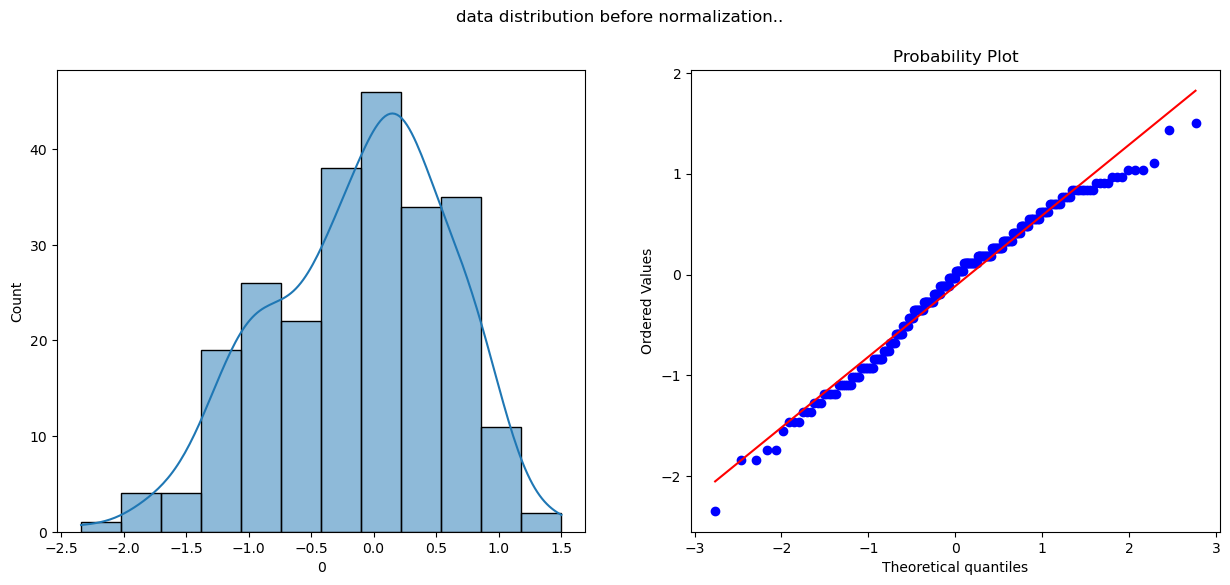

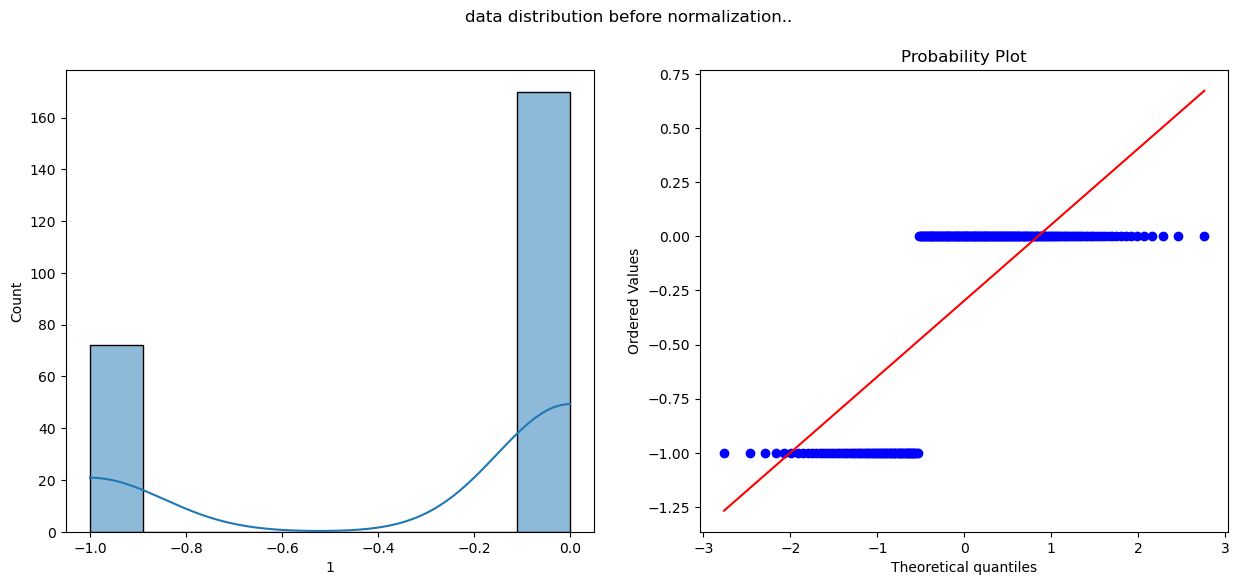

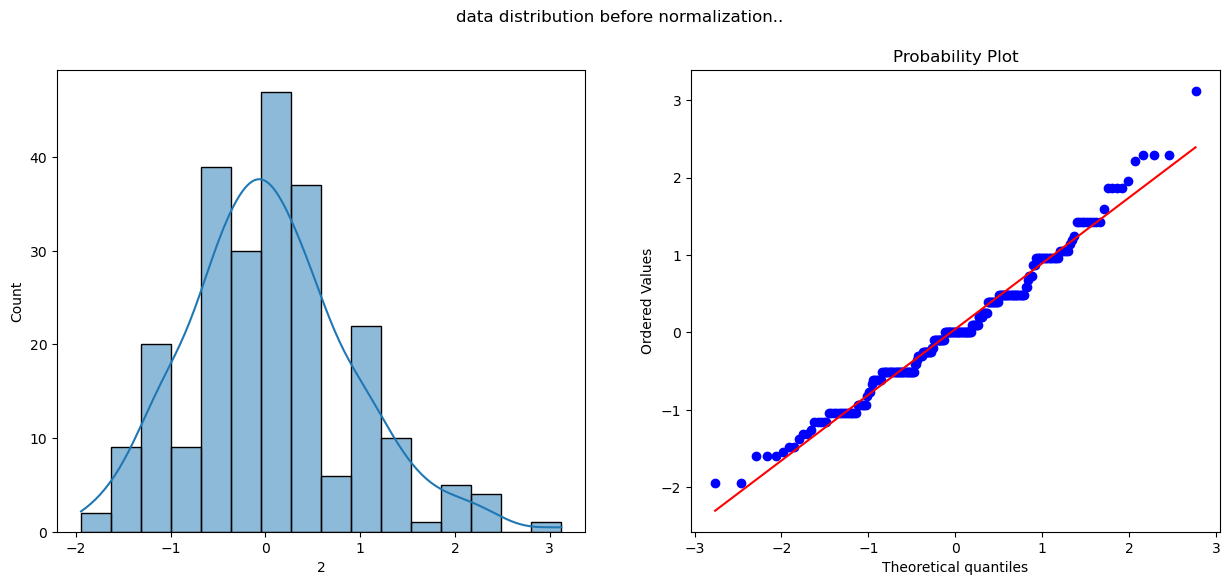

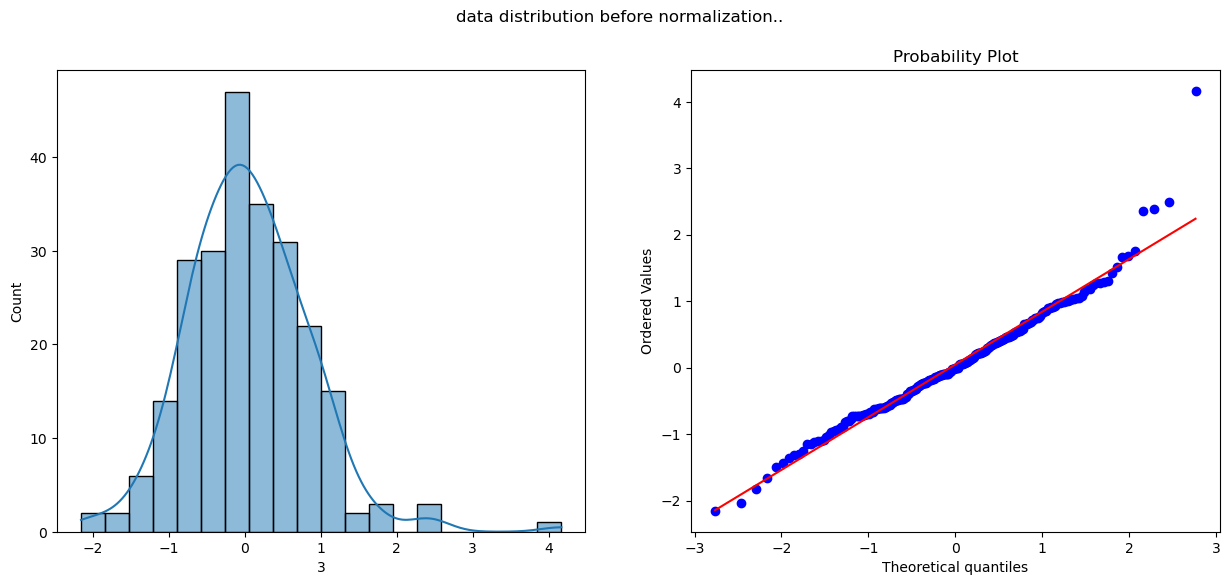

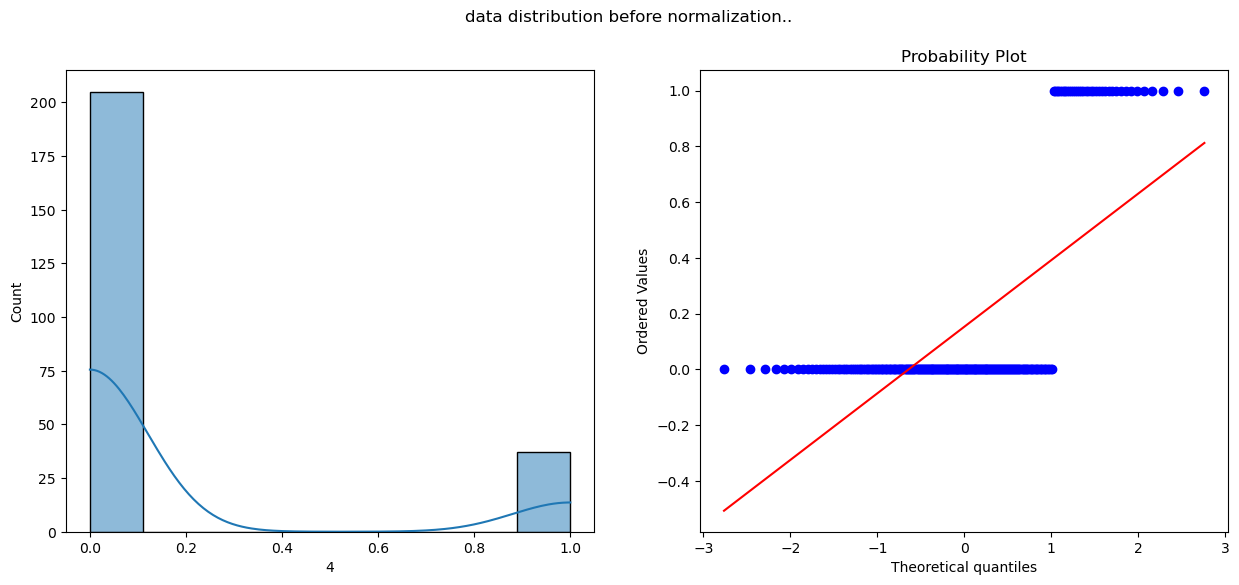

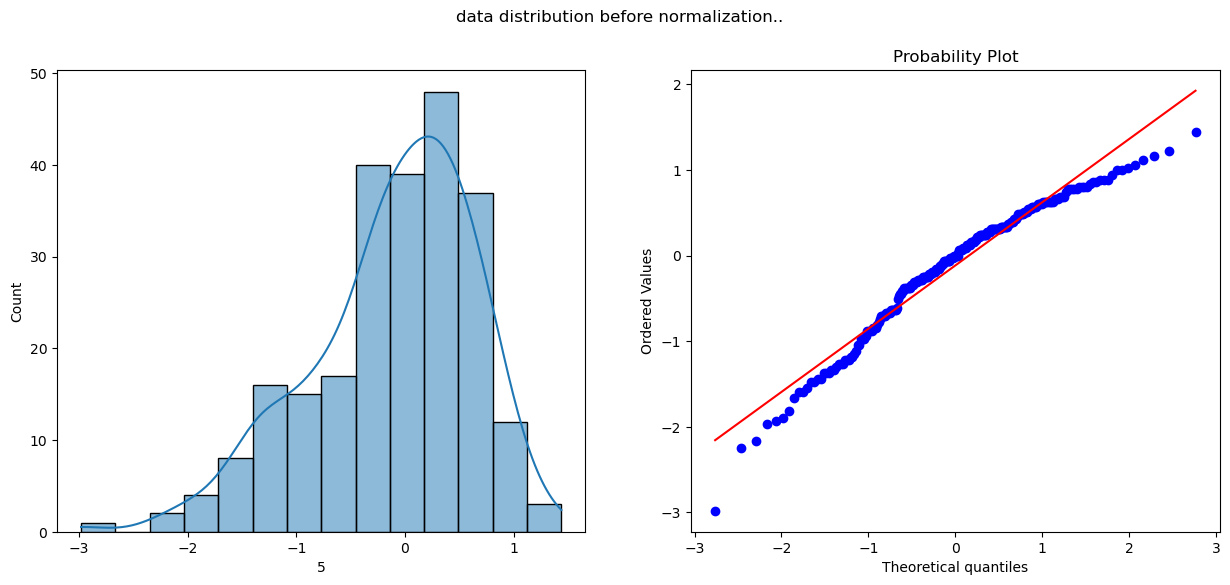

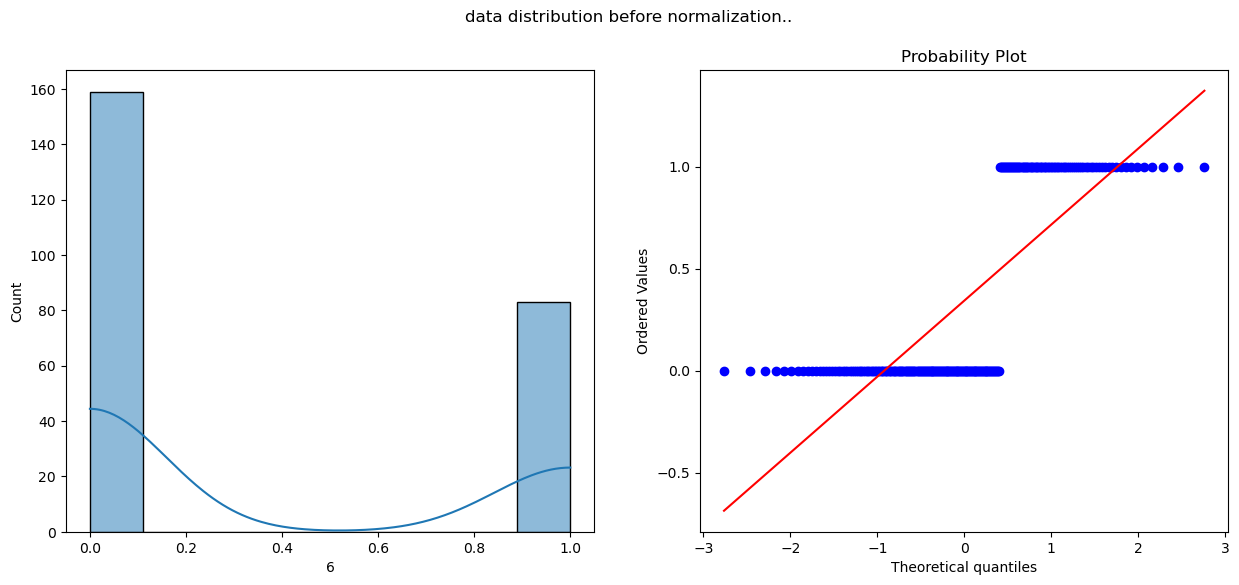

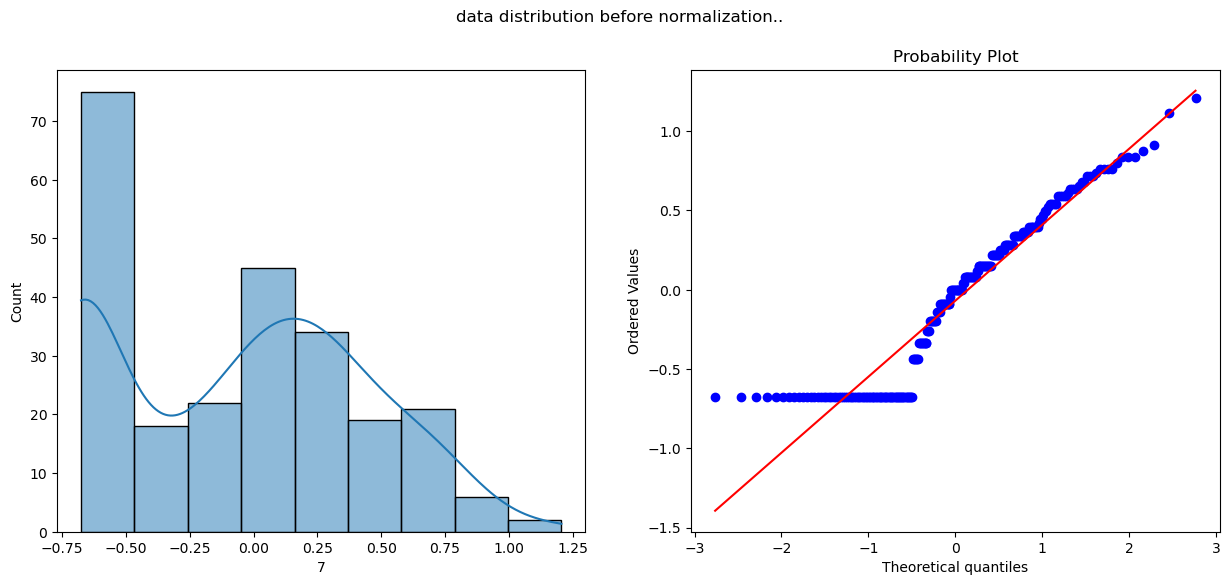

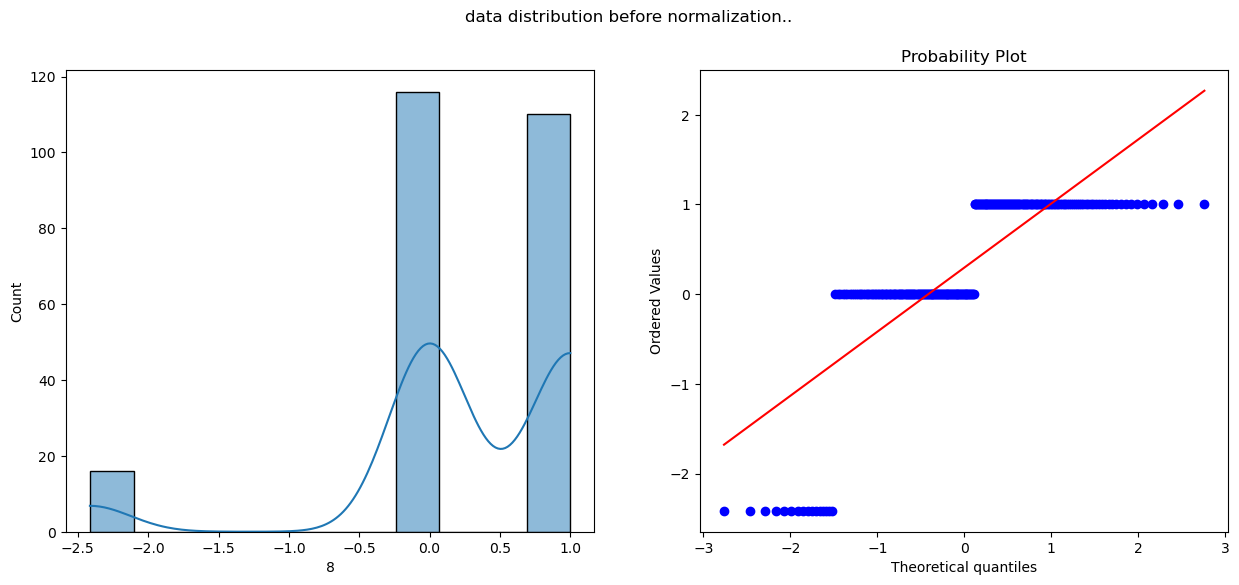

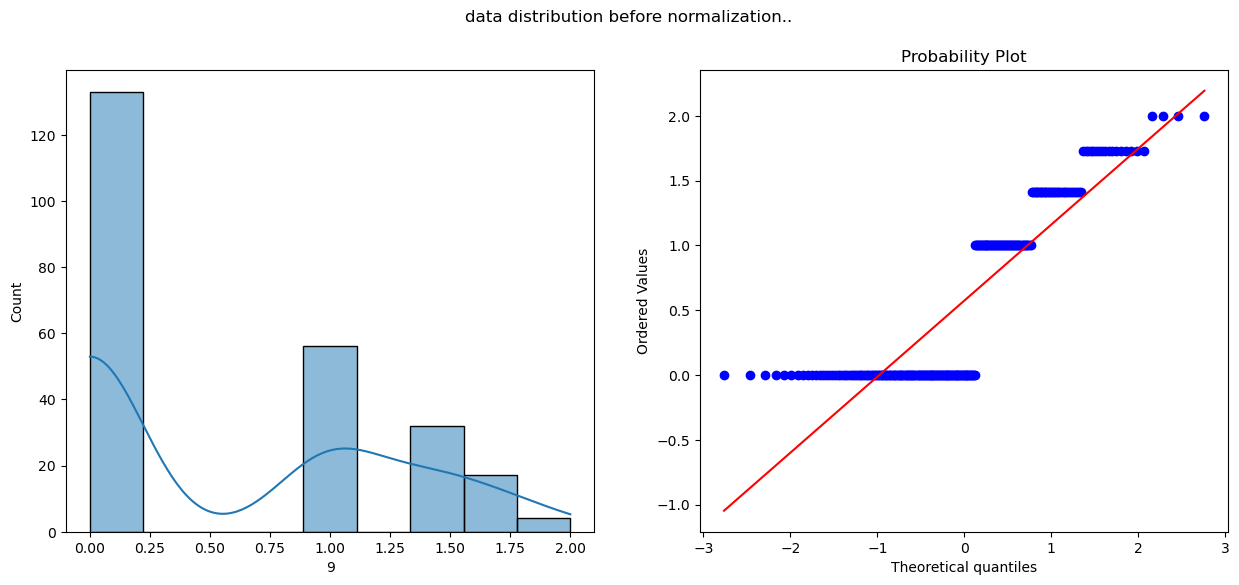

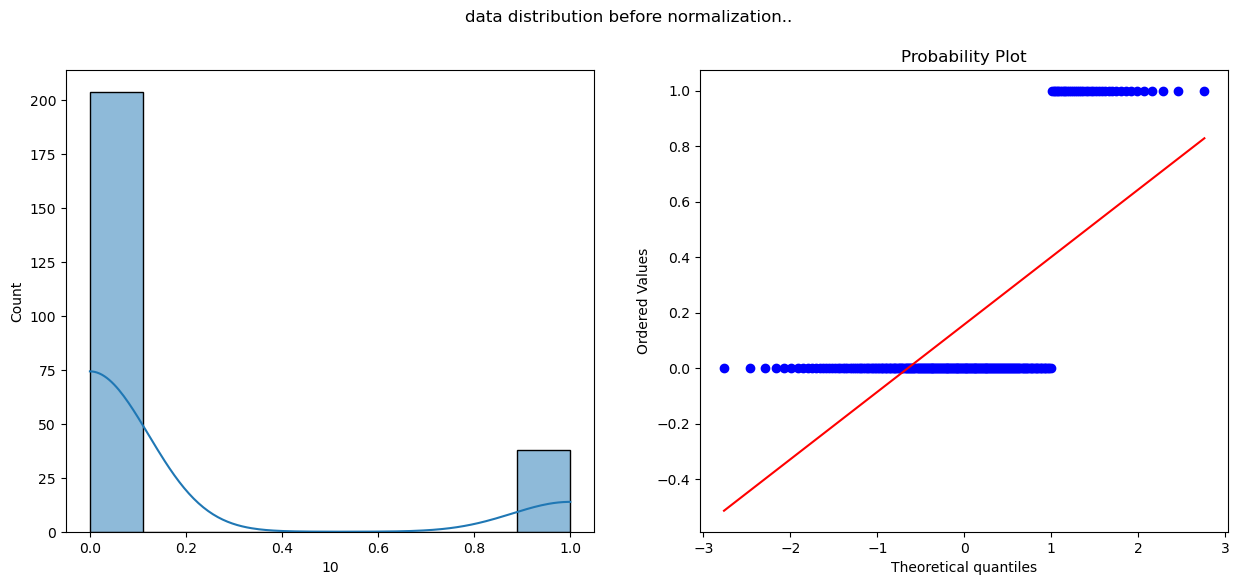

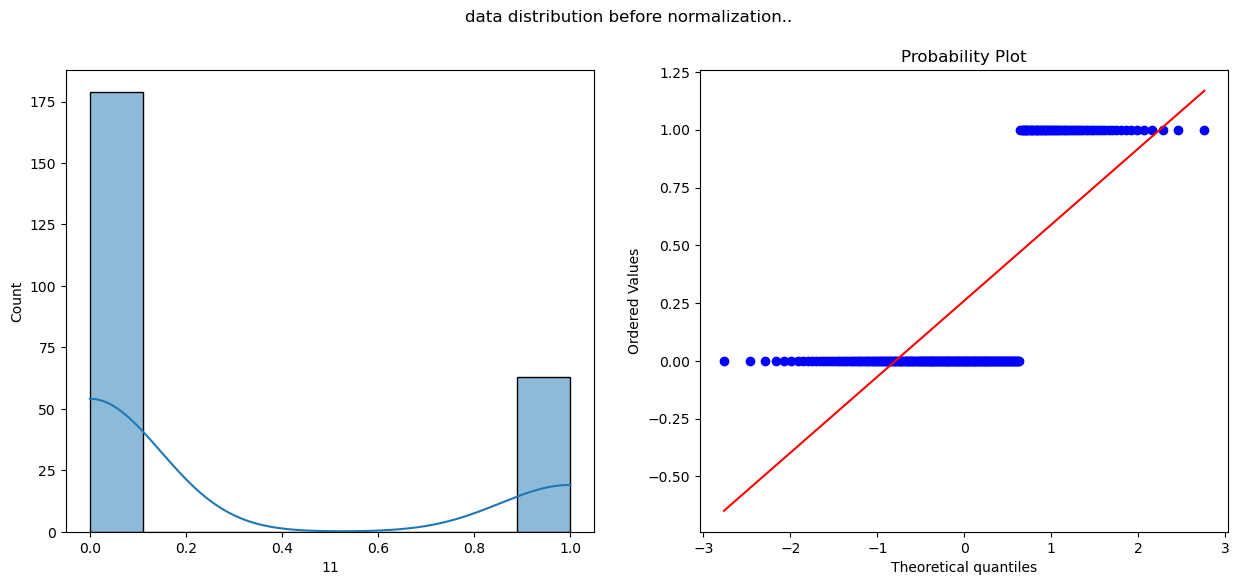

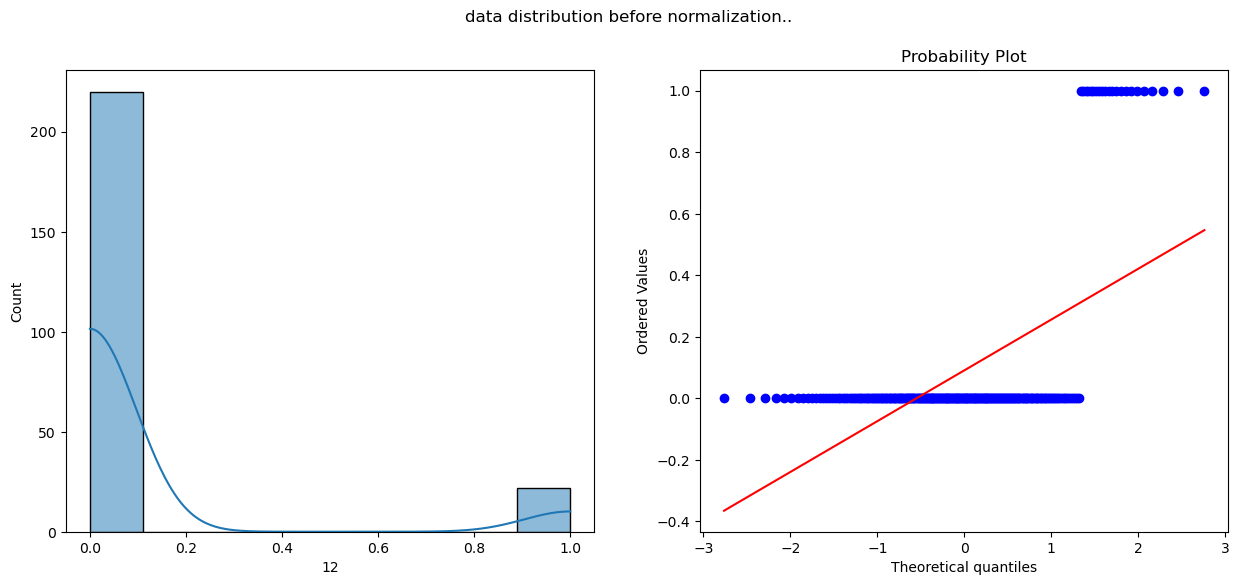

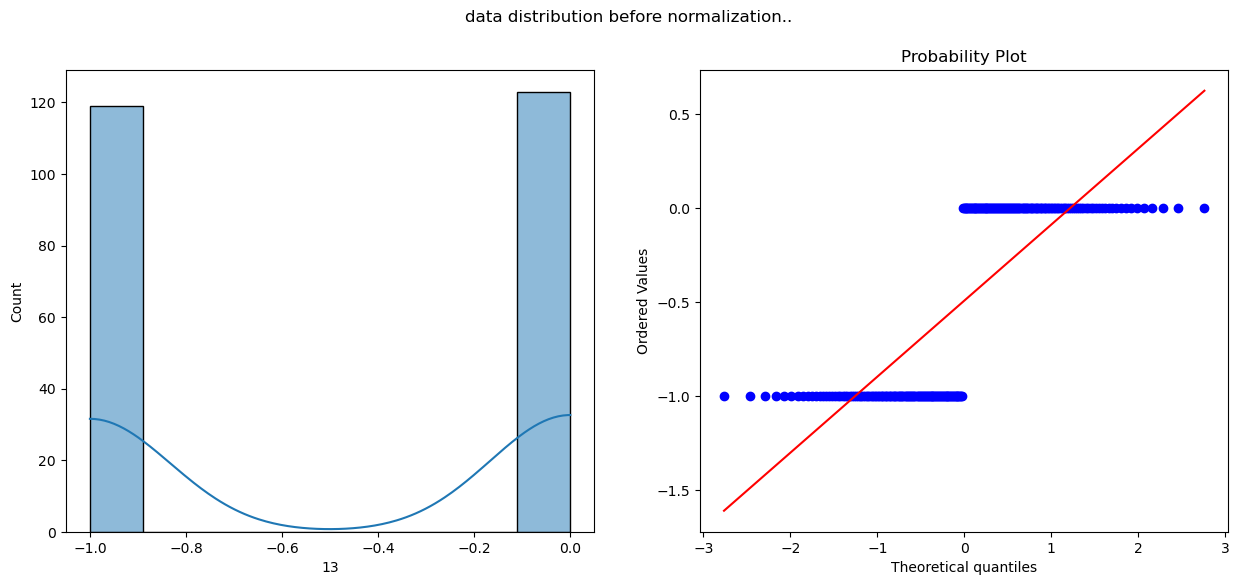

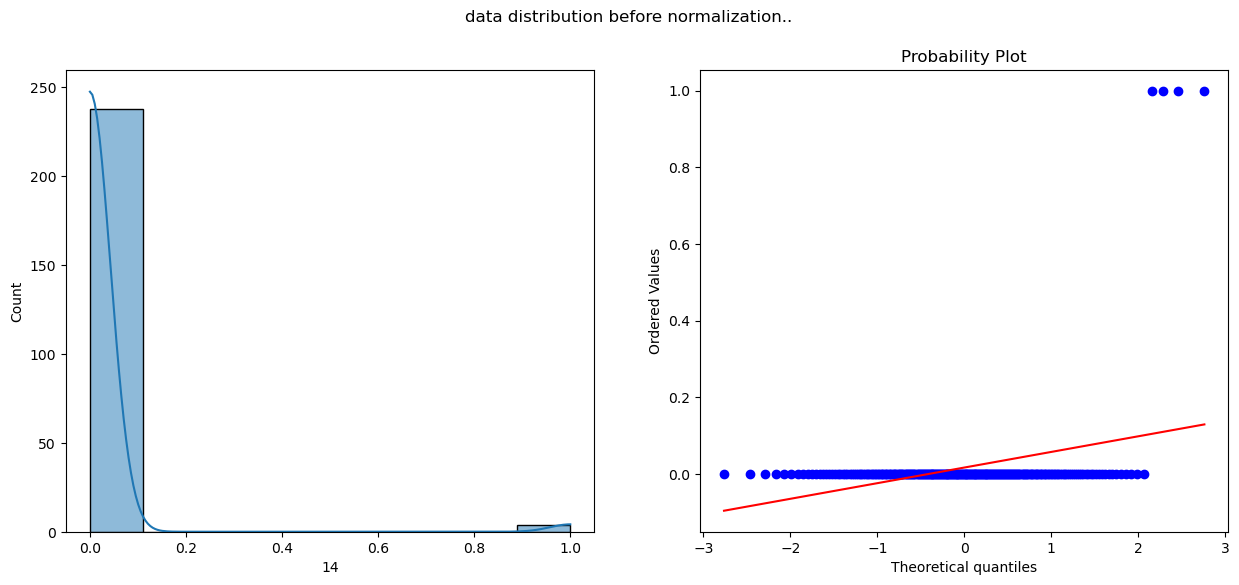

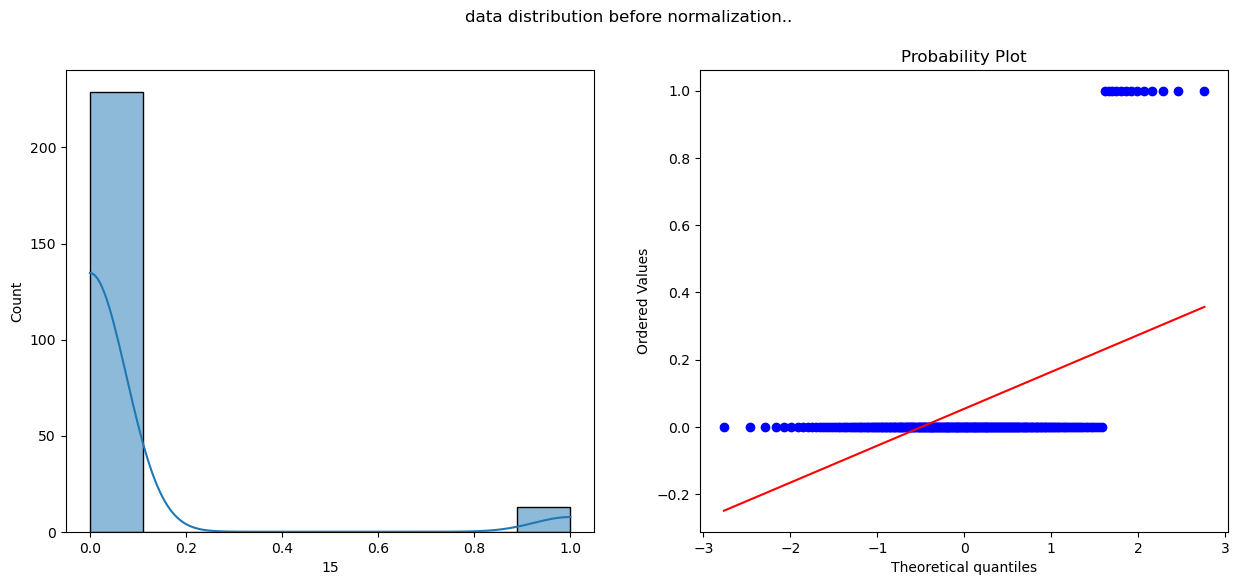

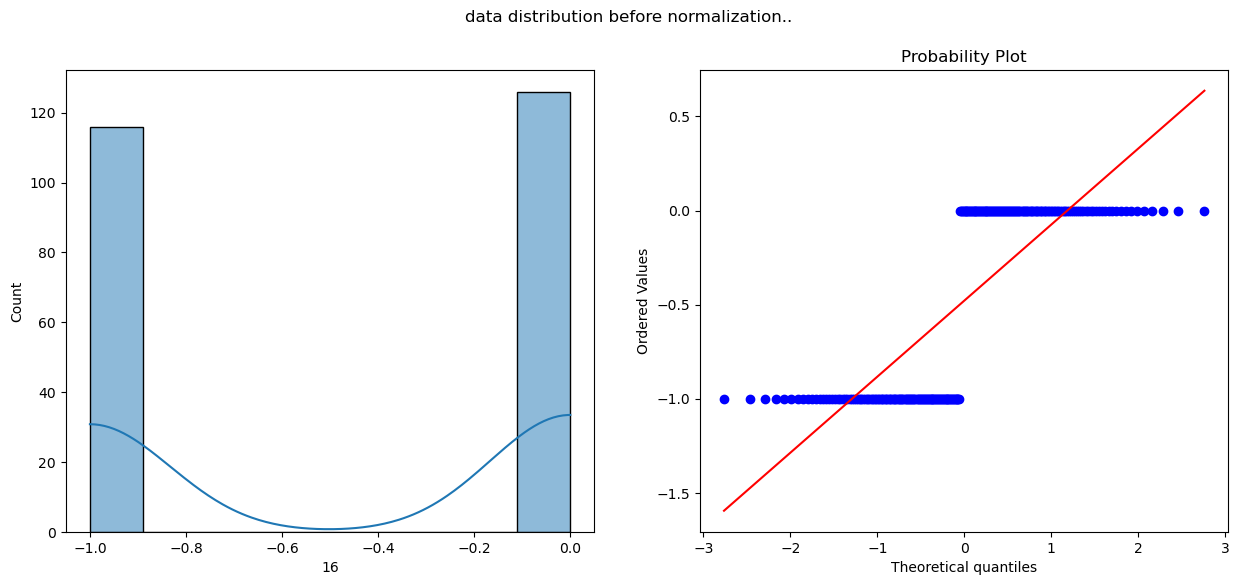

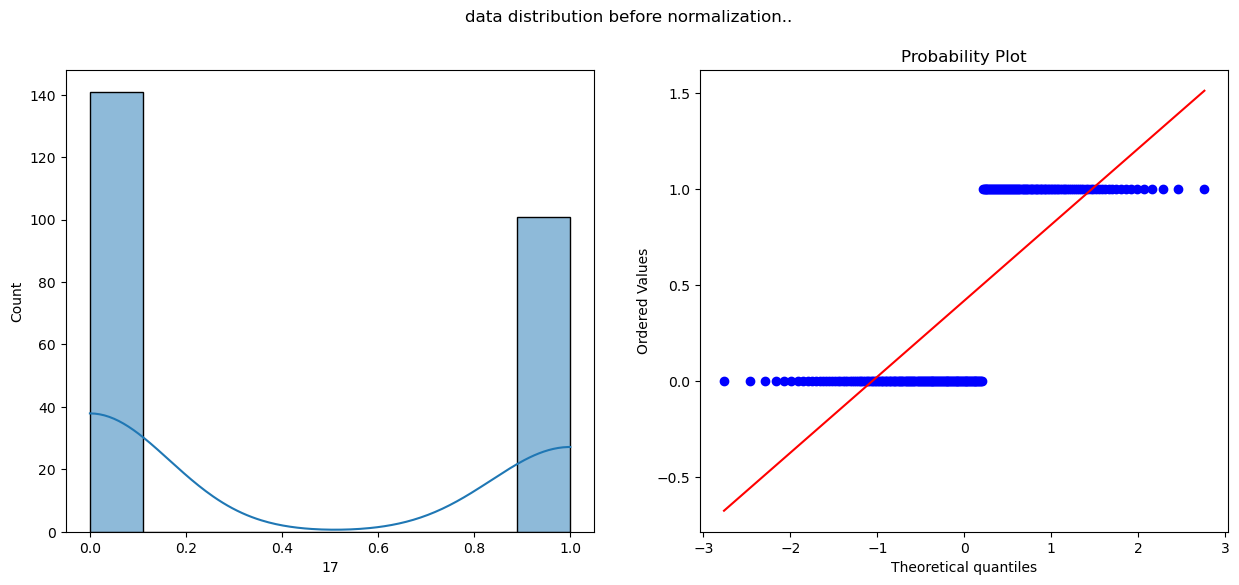

In [39]:

for i in X_train.columns:
    data_norm(X_train, i)

In [29]:
X_train_copy = X_train.copy()

In [30]:
X_train_copy.head()

age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  slope  ca  cp_1  \
78    52    1       128   205    1      184      0      0.0      2   0     1   
53    44    0       108   141    0      175      0      0.6      1   0     0   
131   49    0       134   271    0      162      0      0.0      1   0     1   
175   40    1       110   167    0      114      1      2.0      1   0     0   
130   54    0       160   201    0      163      0      0.0      2   1     0   

     cp_2  cp_3  restecg_1  restecg_2  thal_1  thal_2  thal_3  
78      0     0          1          0       0       1       0  
53      1     0          1          0       0       1       0  
131     0     0          1          0       0       1       0  
175     0     0          0          0       0       0       1  
130     1     0          1          0       0       1       0

## Data Normalization using Square root transformation

In [31]:
## square

X_train  = X_train**(1/2)
X_train.head()

age  sex   trestbps       chol  fbs    thalach  exang   oldpeak  \
78   7.211103  1.0  11.313708  14.317821  1.0  13.564660    0.0  0.000000   
53   6.633250  0.0  10.392305  11.874342  0.0  13.228757    0.0  0.774597   
131  7.000000  0.0  11.575837  16.462078  0.0  12.727922    0.0  0.000000   
175  6.324555  1.0  10.488088  12.922848  0.0  10.677078    1.0  1.414214   
130  7.348469  0.0  12.649111  14.177447  0.0  12.767145    0.0  0.000000   

        slope   ca  cp_1  cp_2  cp_3  restecg_1  restecg_2  thal_1  thal_2  \
78   1.414214  0.0   1.0   0.0   0.0        1.0        0.0     0.0     1.0   
53   1.000000  0.0   0.0   1.0   0.0        1.0        0.0     0.0     1.0   
131  1.000000  0.0   1.0   0.0   0.0        1.0        0.0     0.0     1.0   
175  1.000000  0.0   0.0   0.0   0.0        0.0        0.0     0.0     0.0   
130  1.414214  1.0   0.0   1.0   0.0        1.0        0.0     0.0     1.0   

     thal_3  
78      0.0  
53      0.0  
131     0.0  
175     1.0  
130     0.0

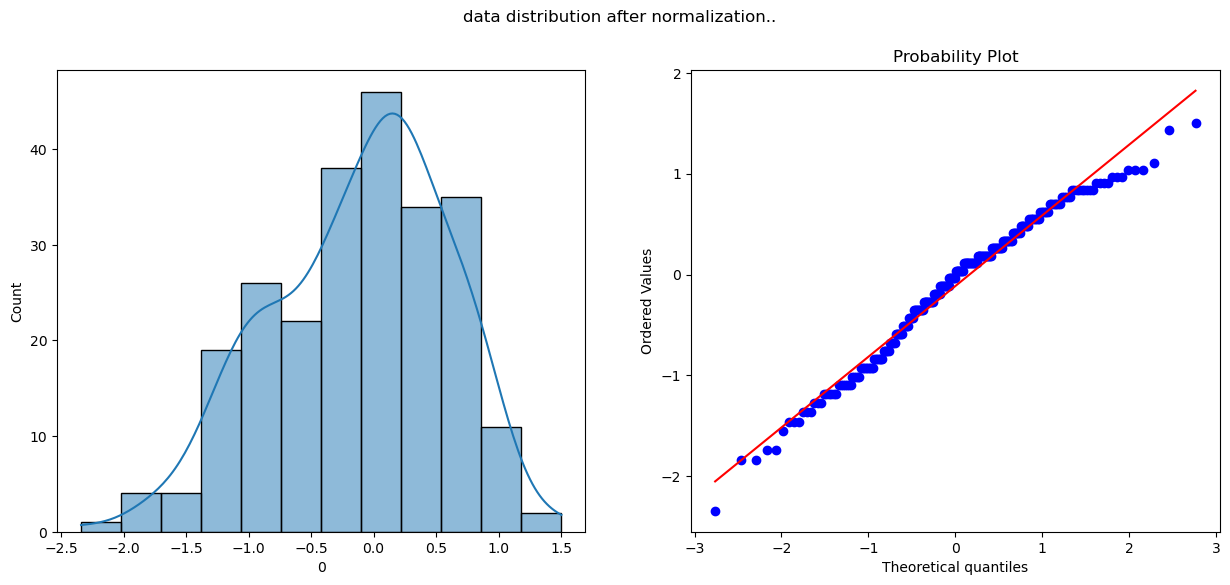

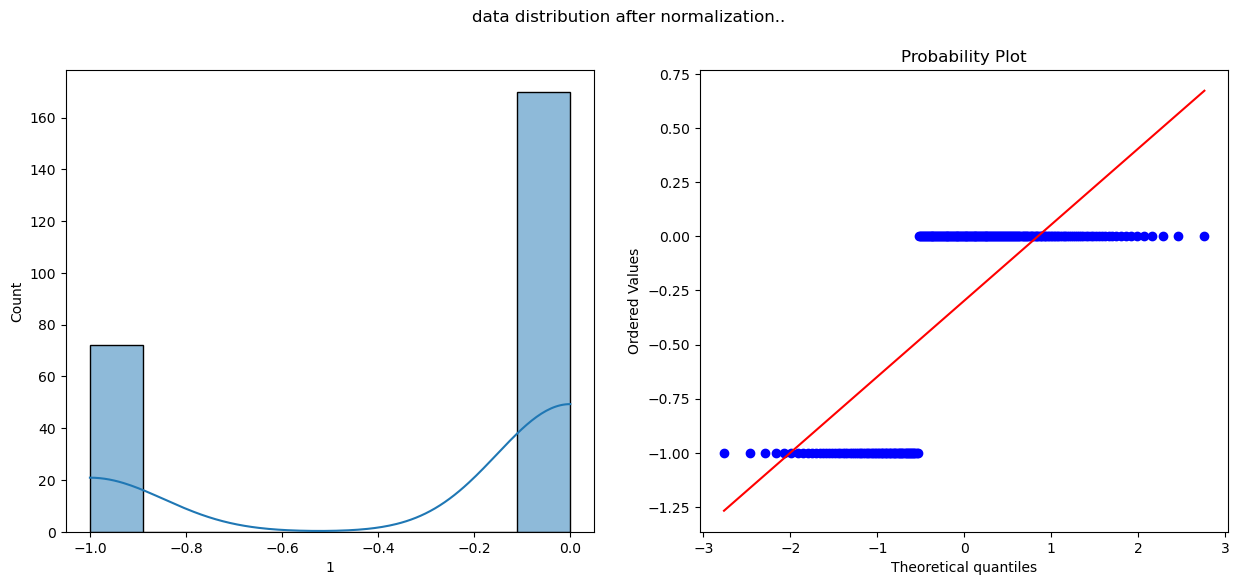

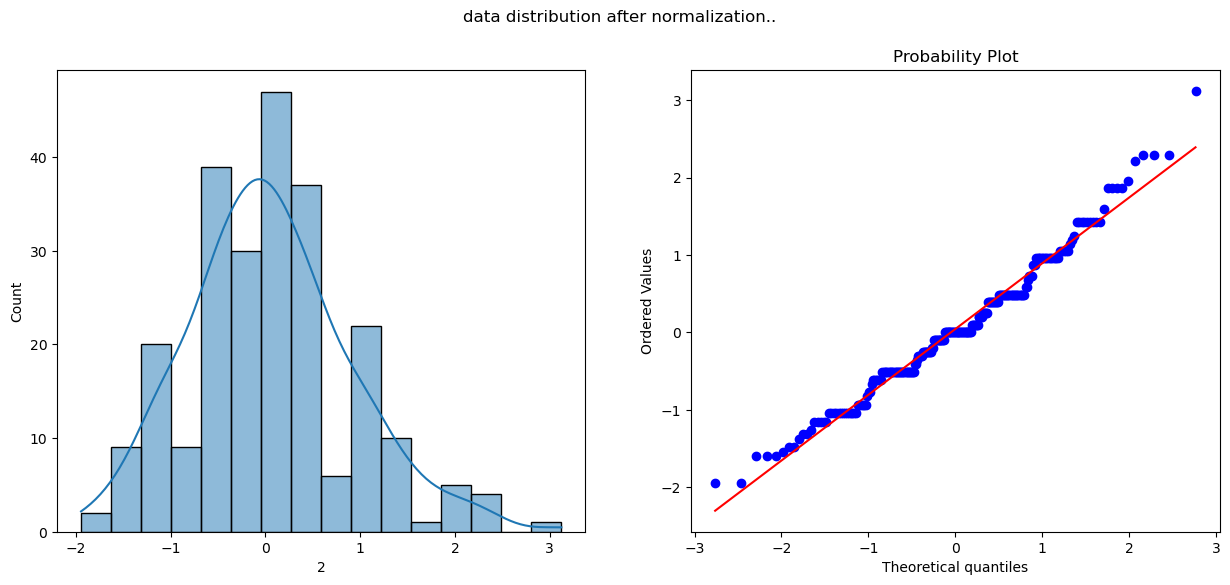

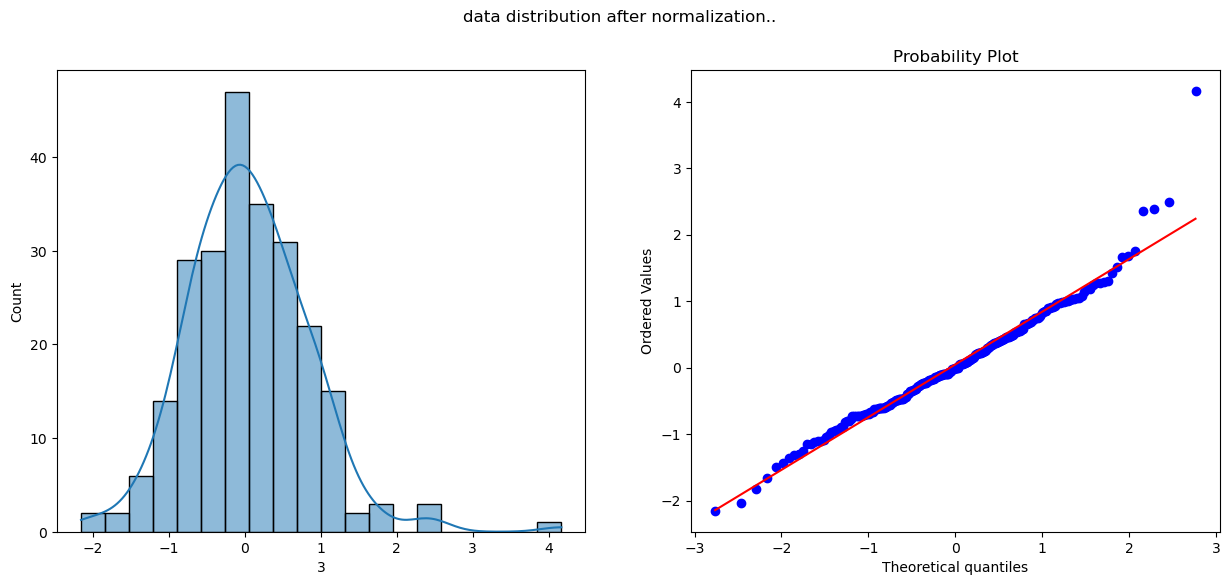

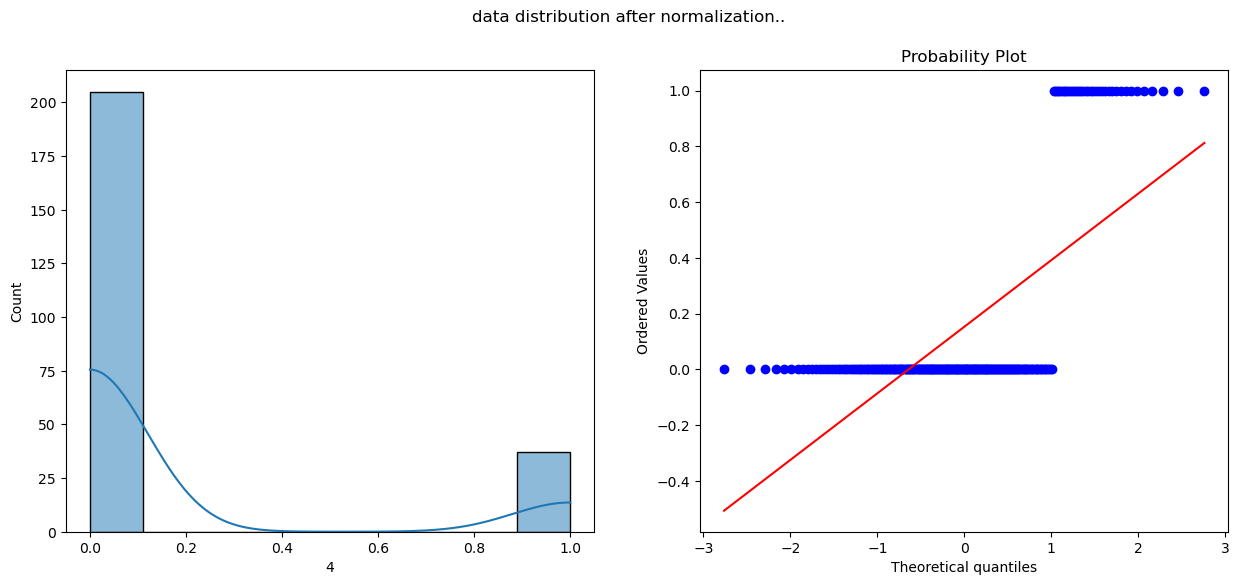

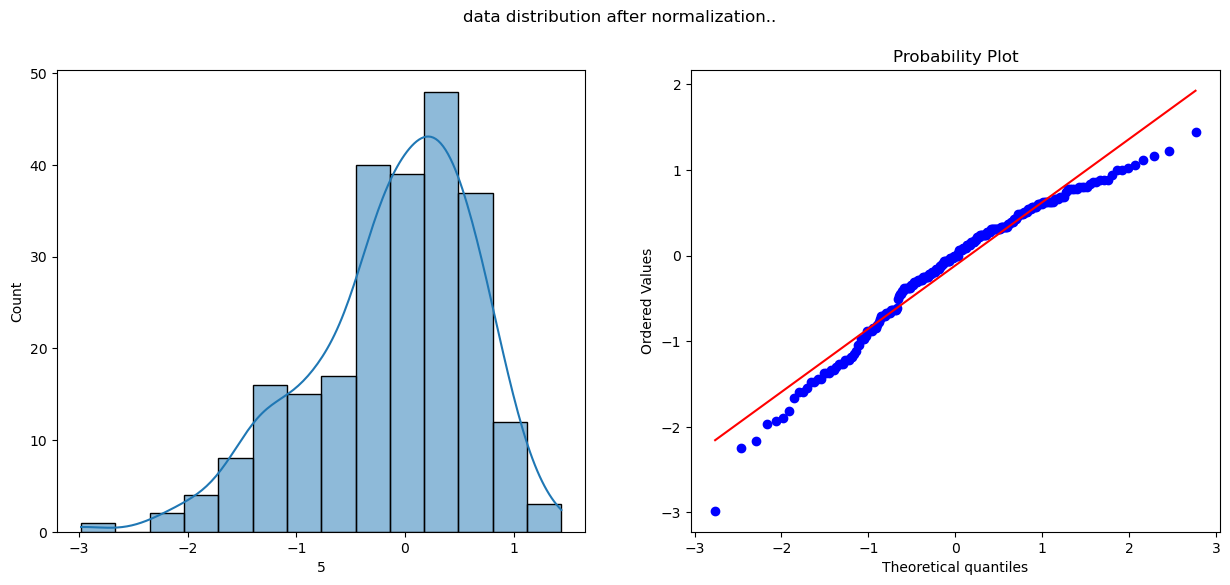

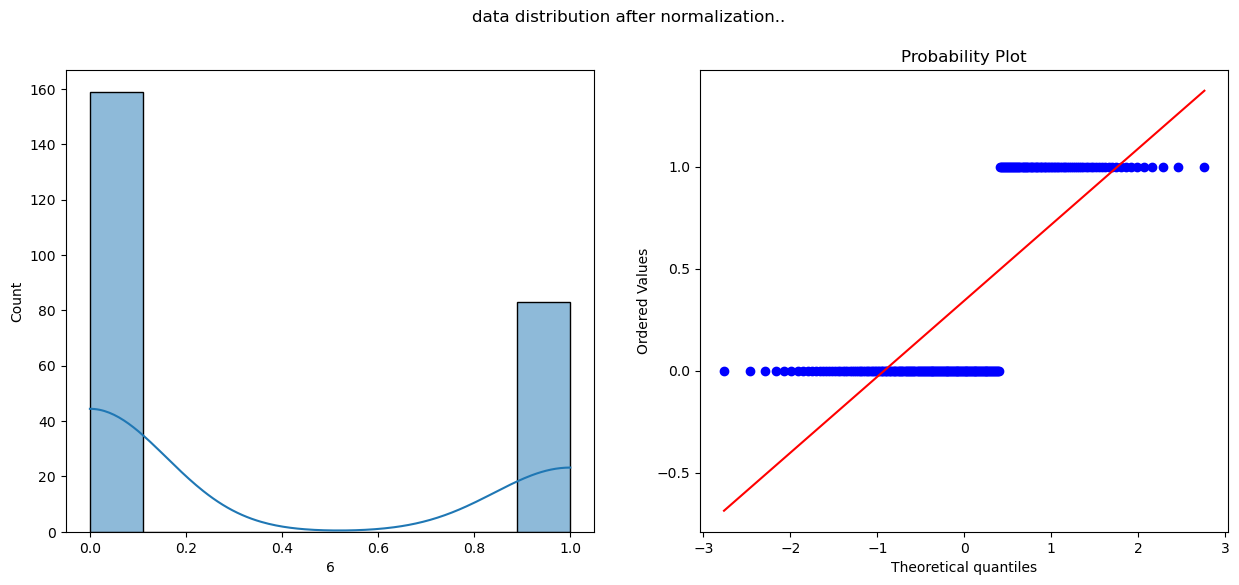

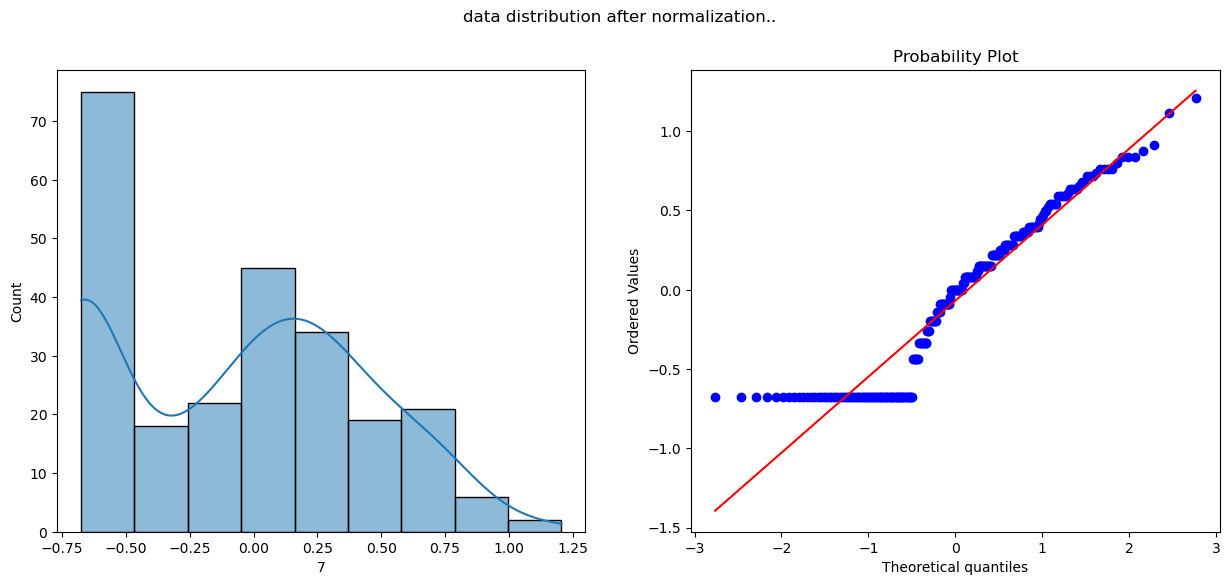

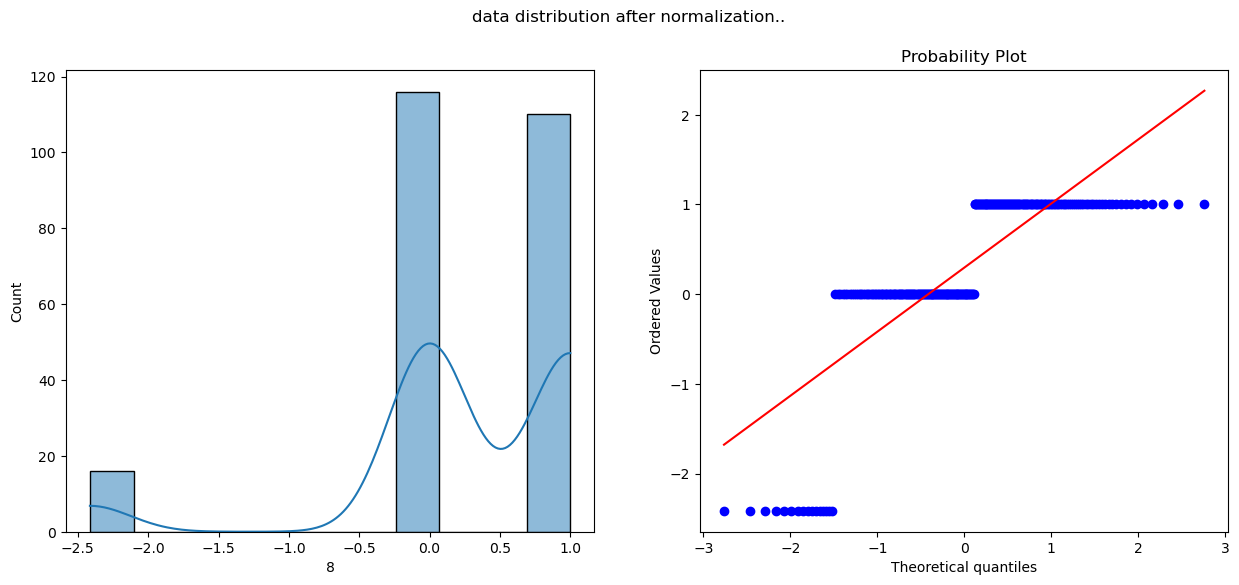

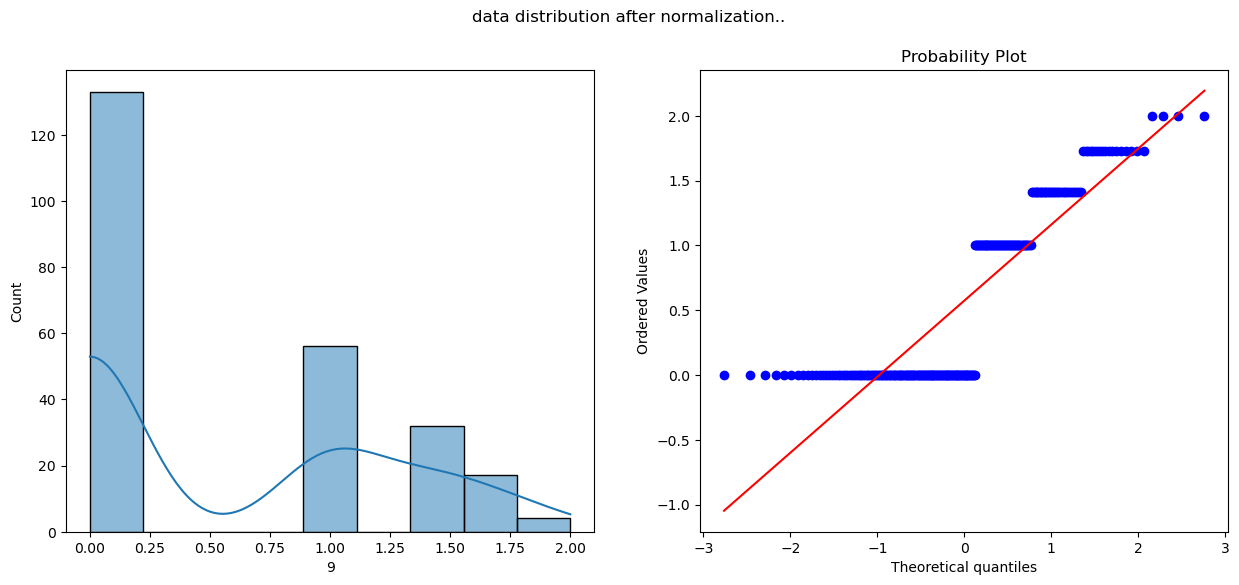

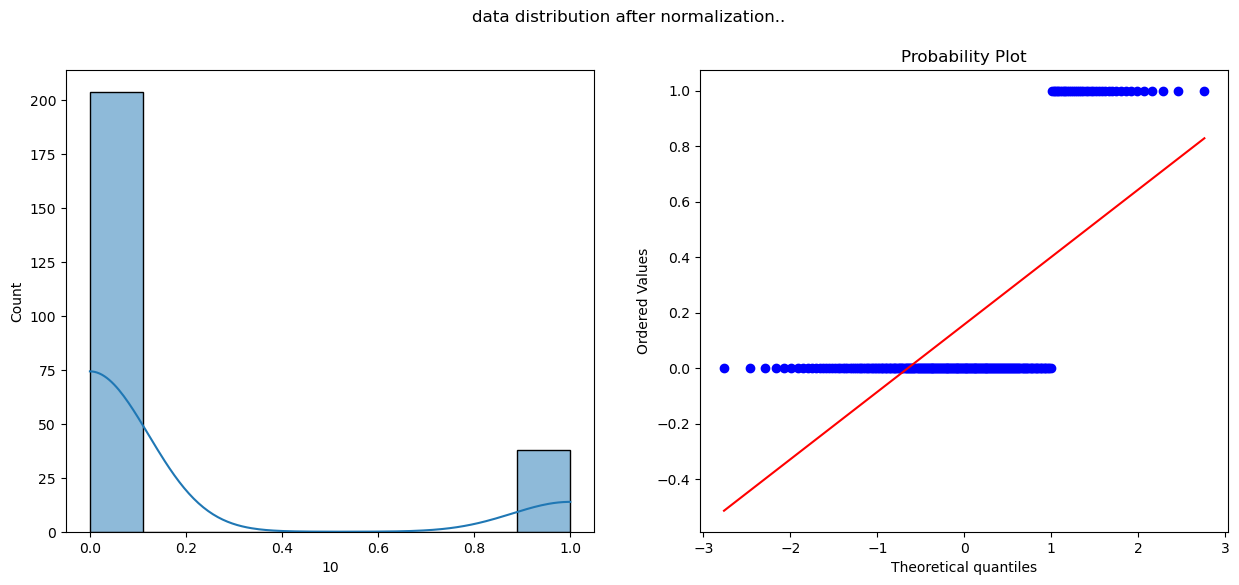

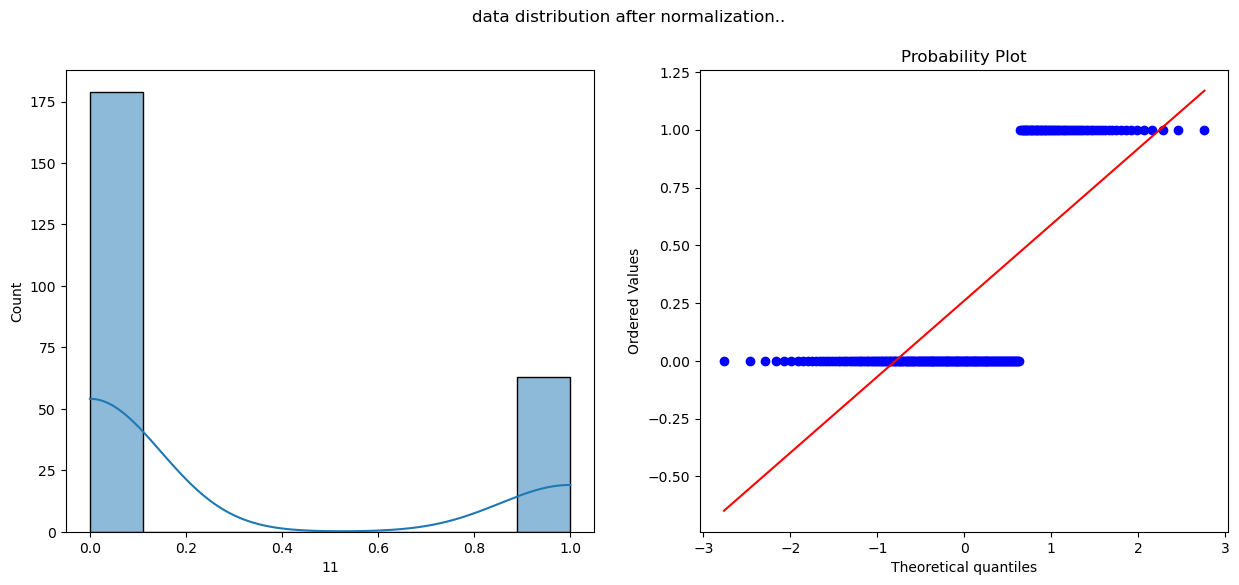

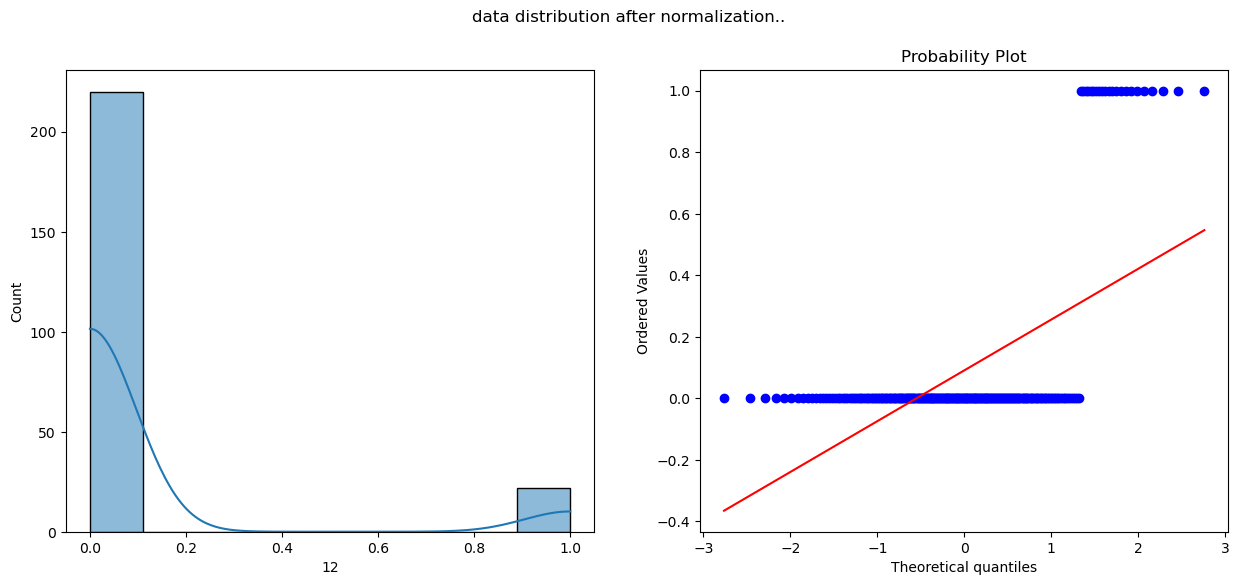

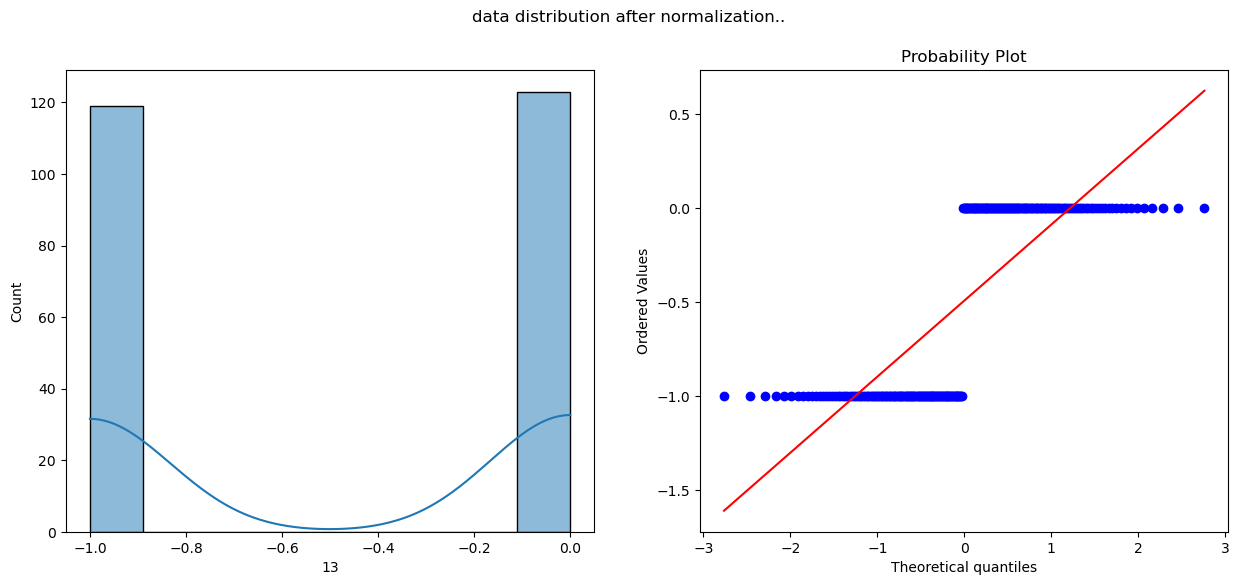

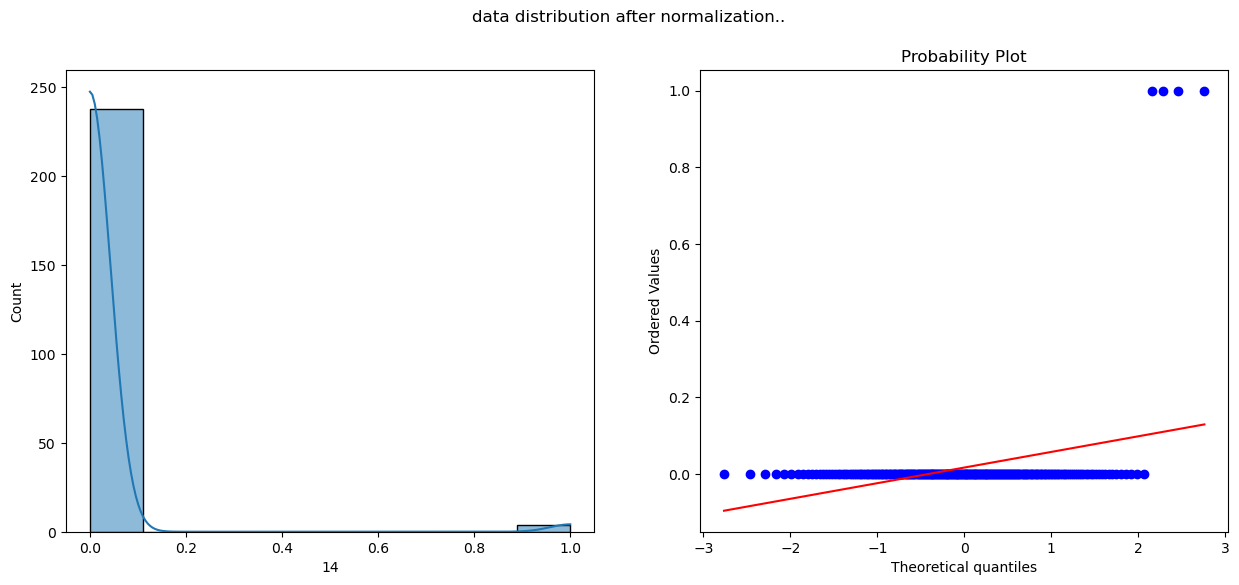

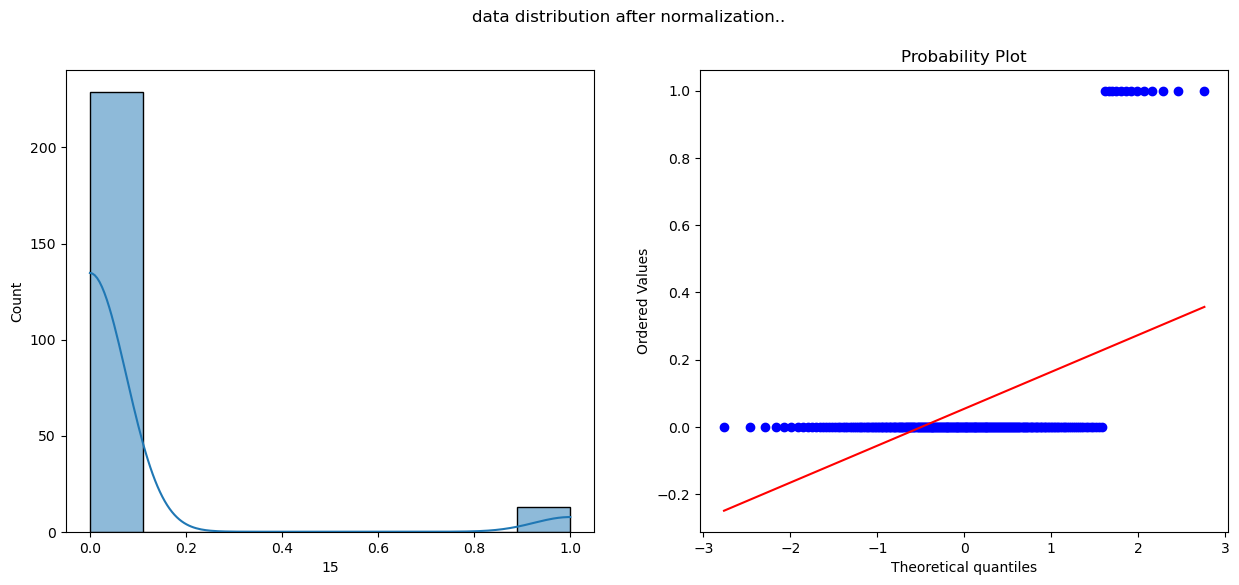

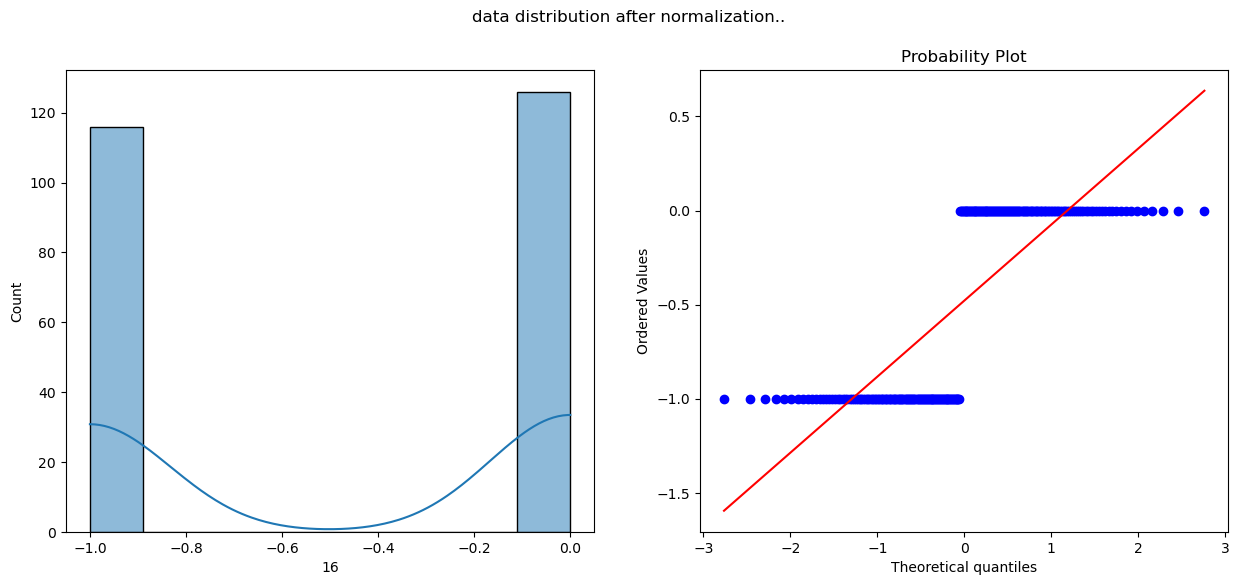

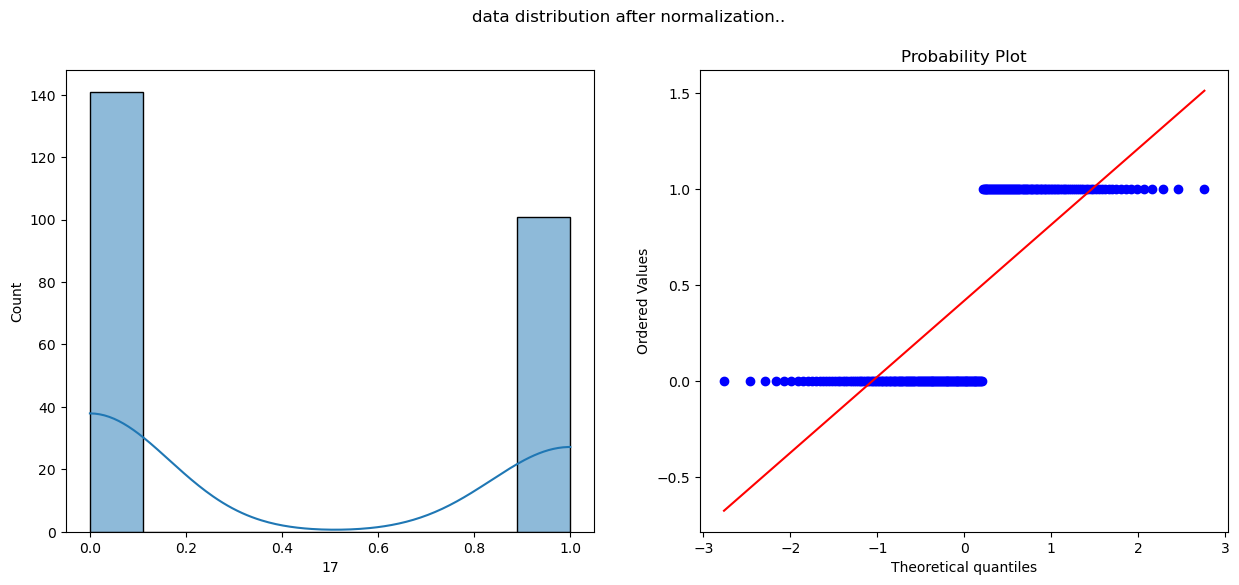

In [42]:
## square
for i in X_train.columns:
    data_norm(X_train, i)

## Robust Scaling

In [33]:
from sklearn.preprocessing import RobustScaler

In [34]:
robust_scaler = RobustScaler()

In [35]:
X_train = robust_scaler.fit_transform(X_train)


In [36]:
X_train = pd.DataFrame(X_train)

X_train.head()

0    1         2         3    4         5    6         7    8    9   \
0 -0.270569  0.0 -0.100313 -0.592473  1.0  0.943755  0.0 -0.676337  1.0  0.0   
1 -0.925696 -1.0 -1.150097 -1.825486  0.0  0.687239  0.0 -0.090612  0.0  0.0   
2 -0.509901 -1.0  0.198338  0.489548  0.0  0.304772  0.0 -0.676337  0.0  0.0   
3 -1.275671  0.0 -1.040967 -1.296396  0.0 -1.261374  1.0  0.393046  0.0  0.0   
4 -0.114832 -1.0  1.421151 -0.663308  0.0  0.334725  0.0 -0.676337  1.0  1.0   

    10   11   12   13   14   15   16   17  
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0 -1.0  0.0  0.0 -1.0  1.0  
4  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0

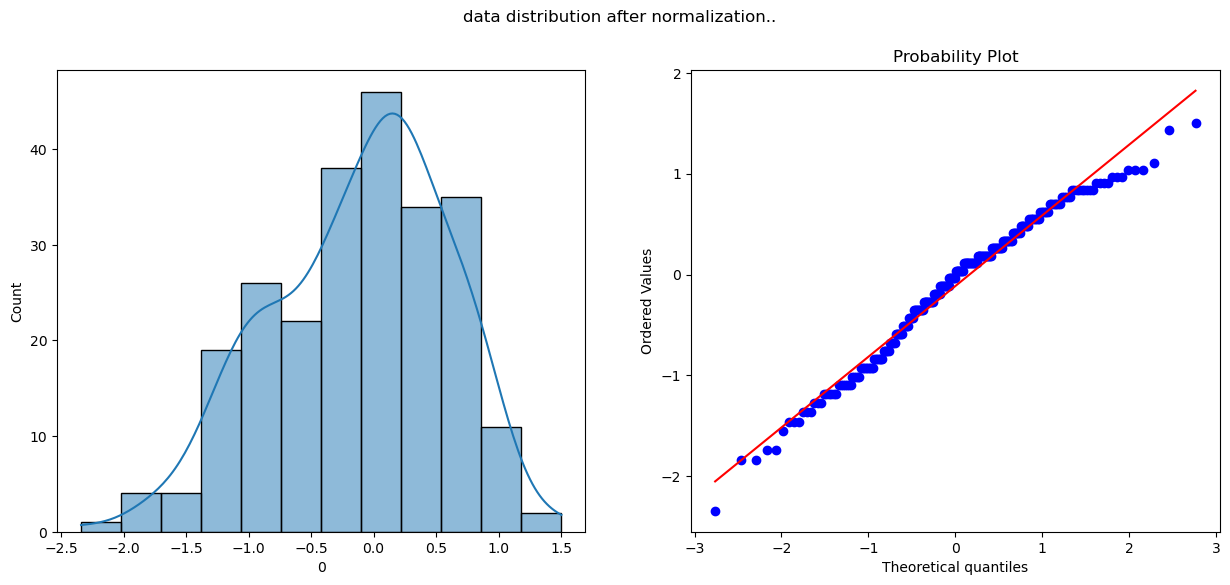

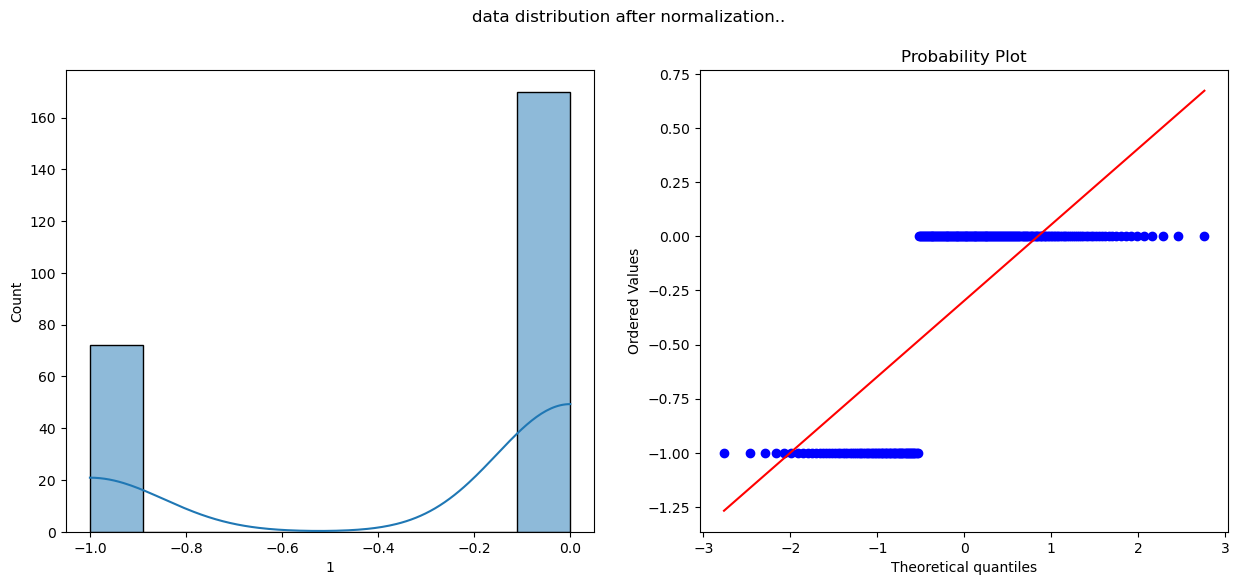

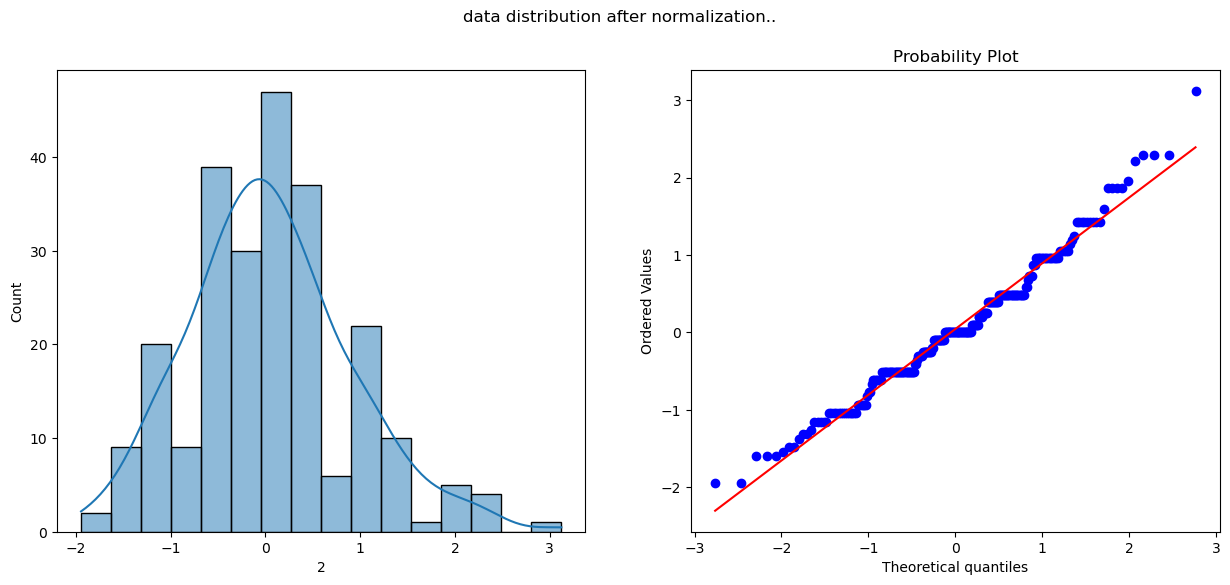

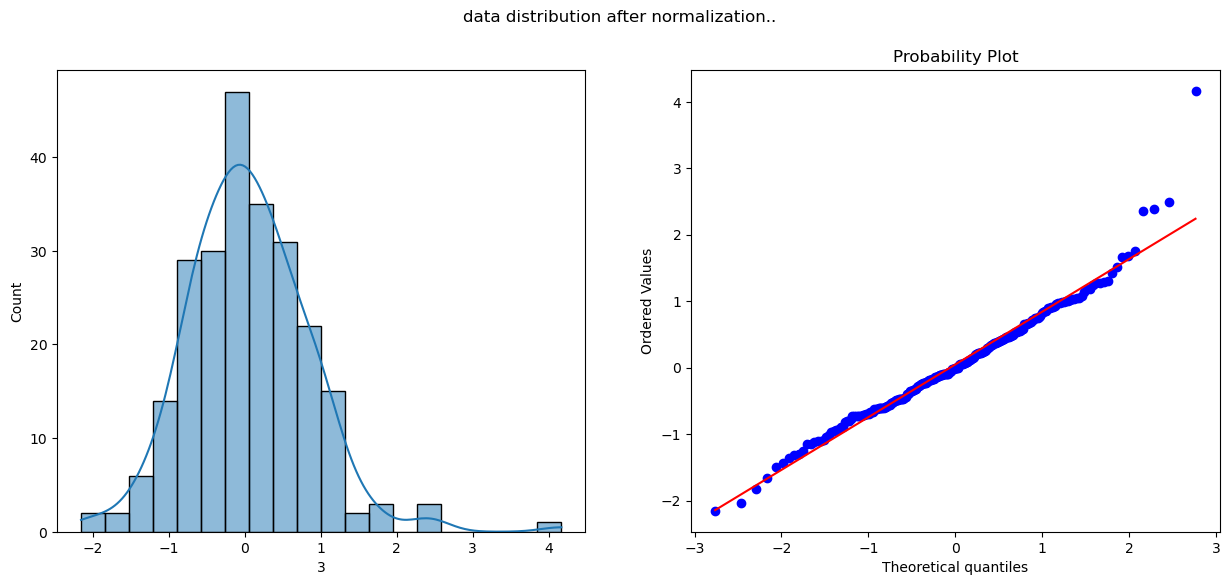

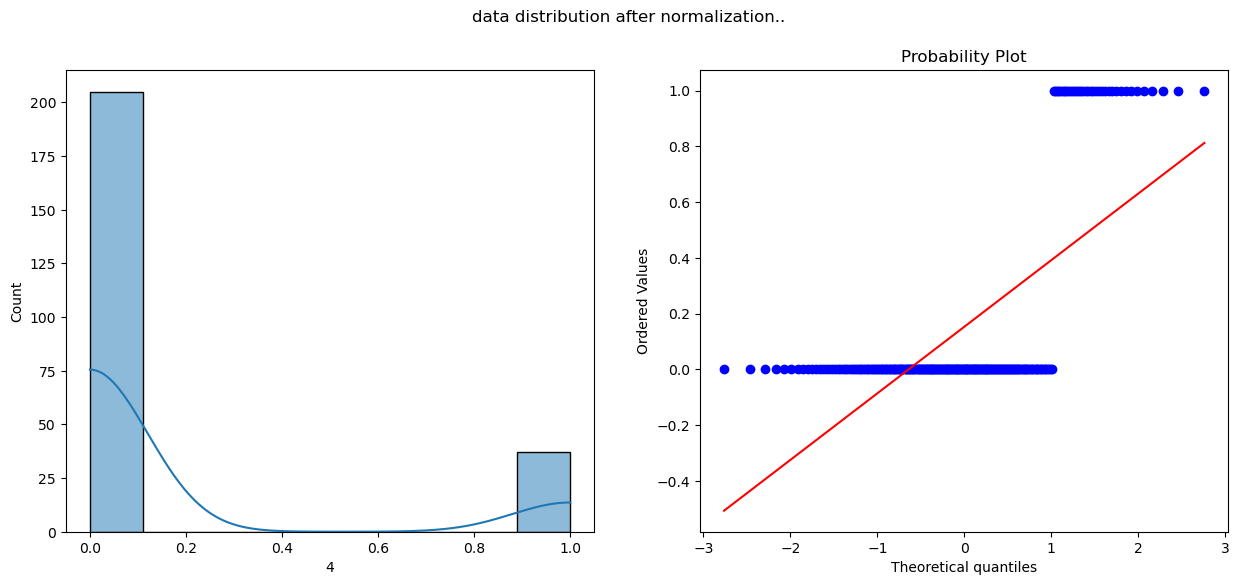

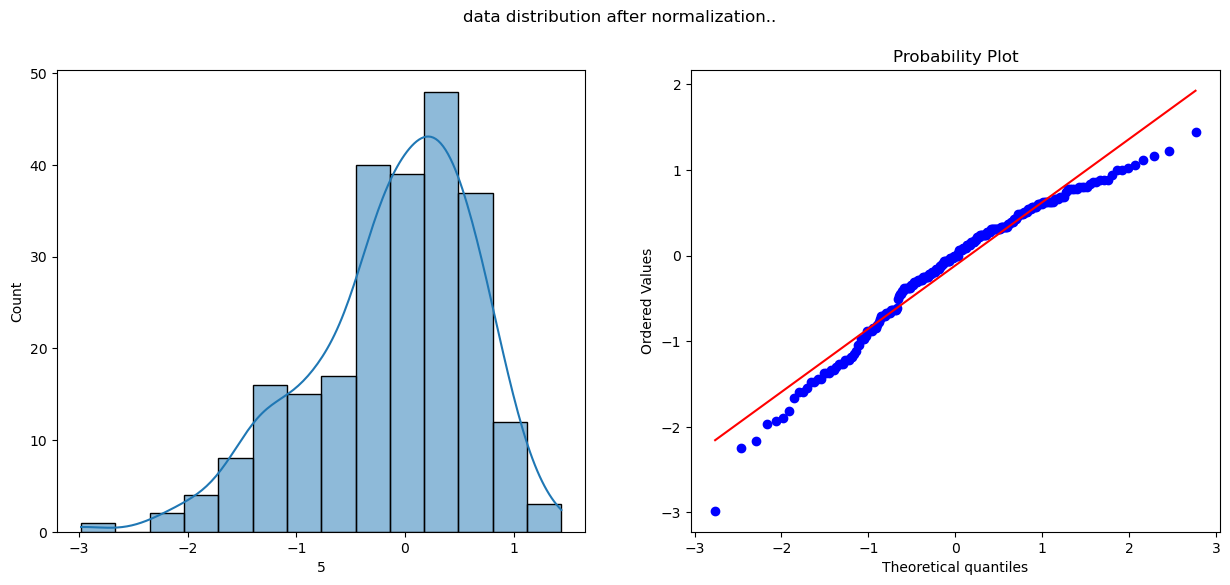

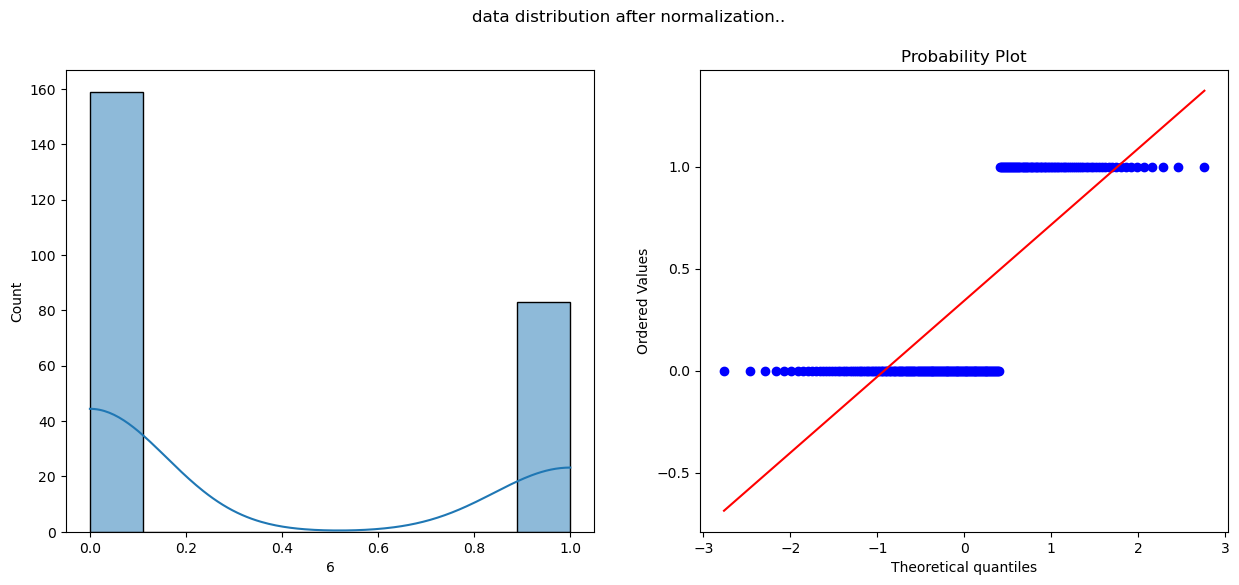

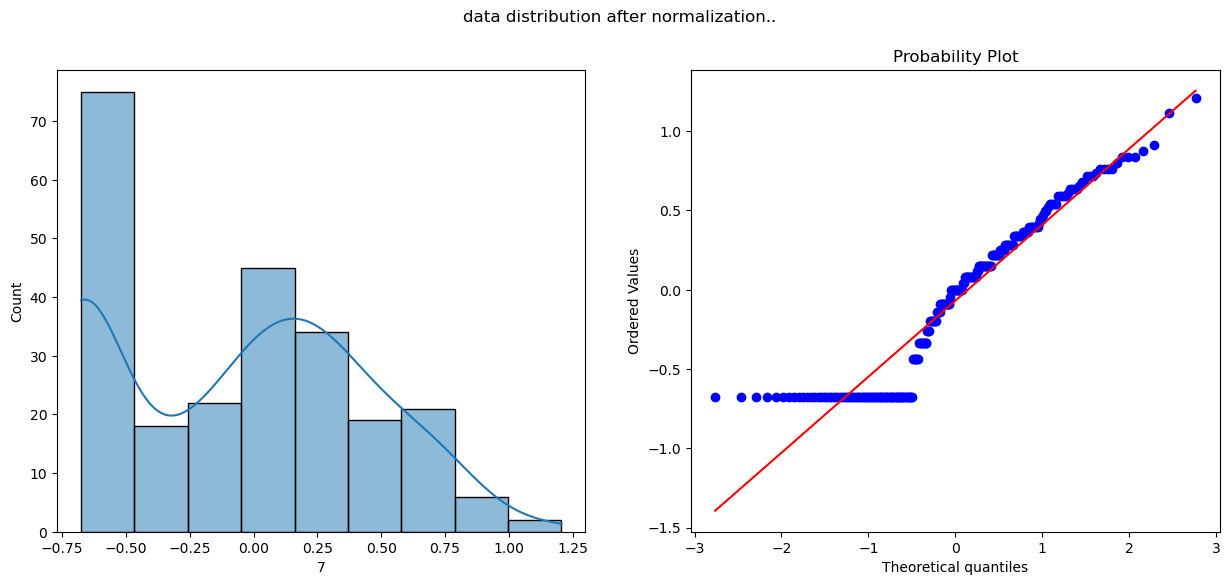

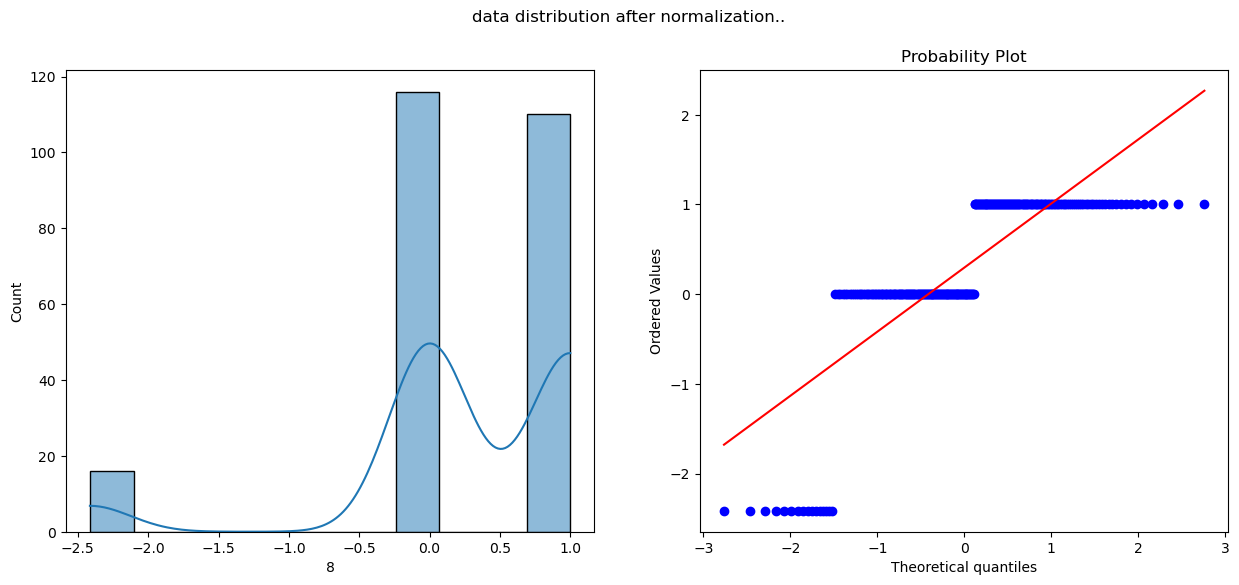

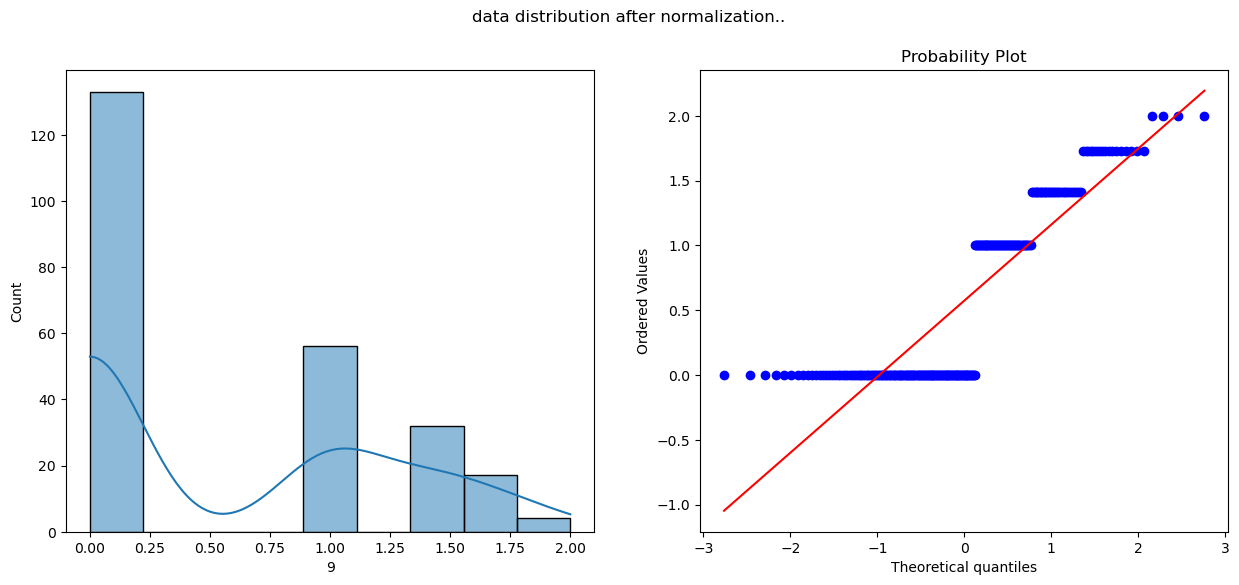

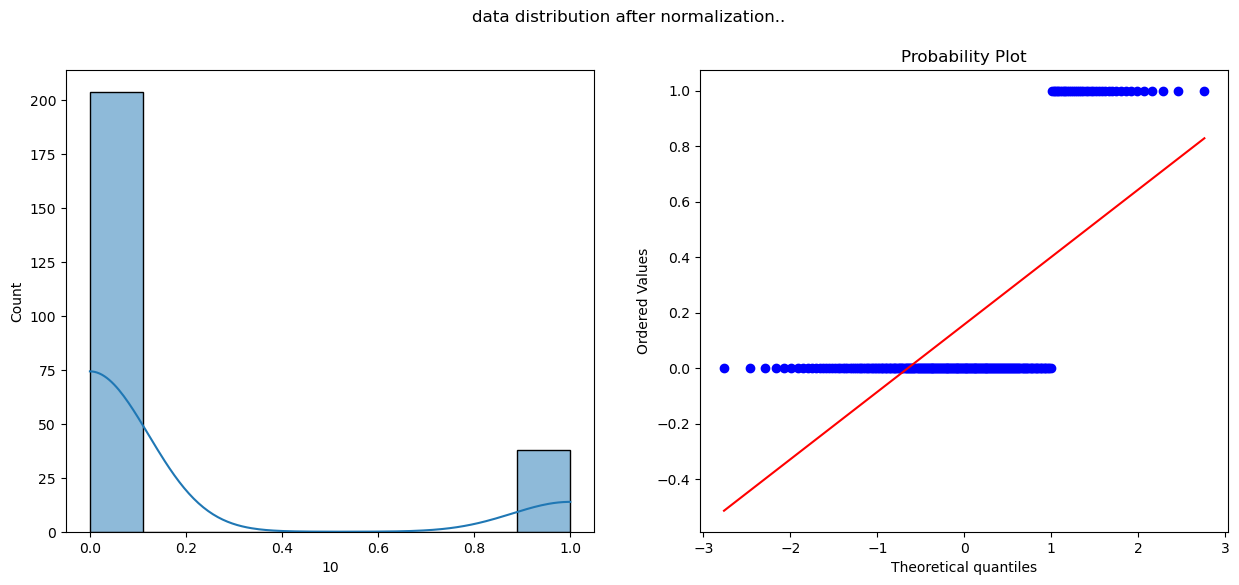

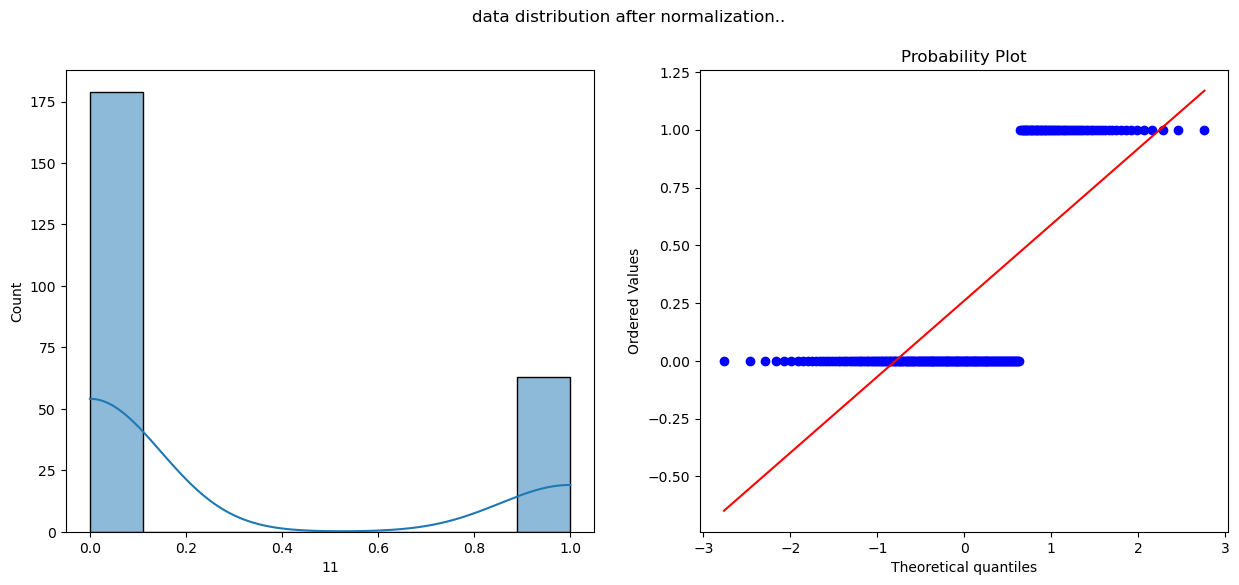

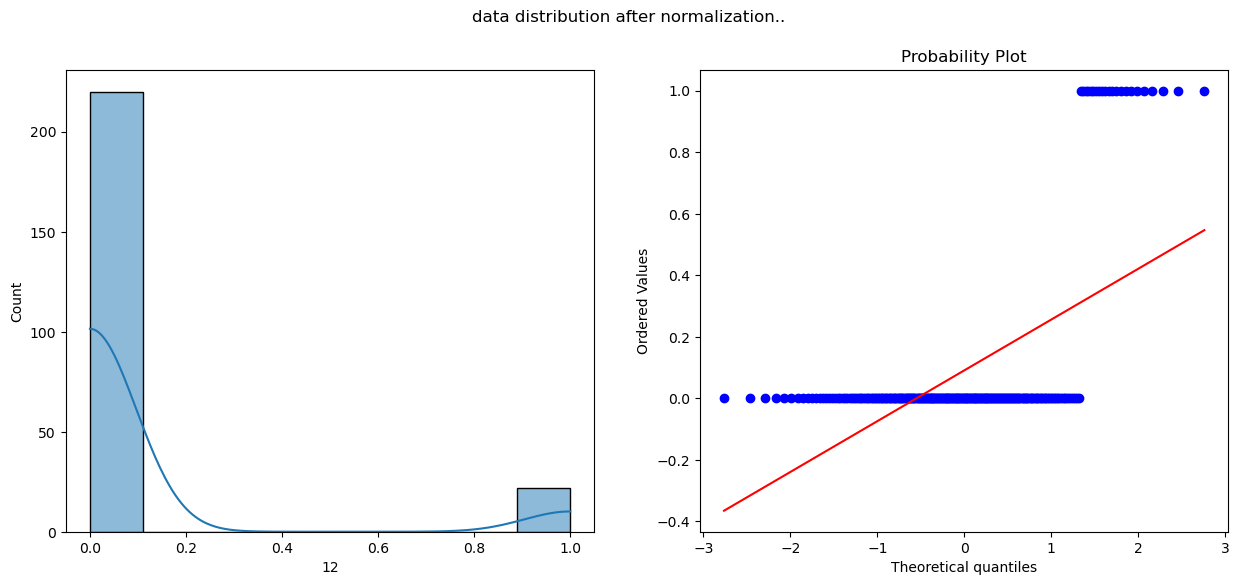

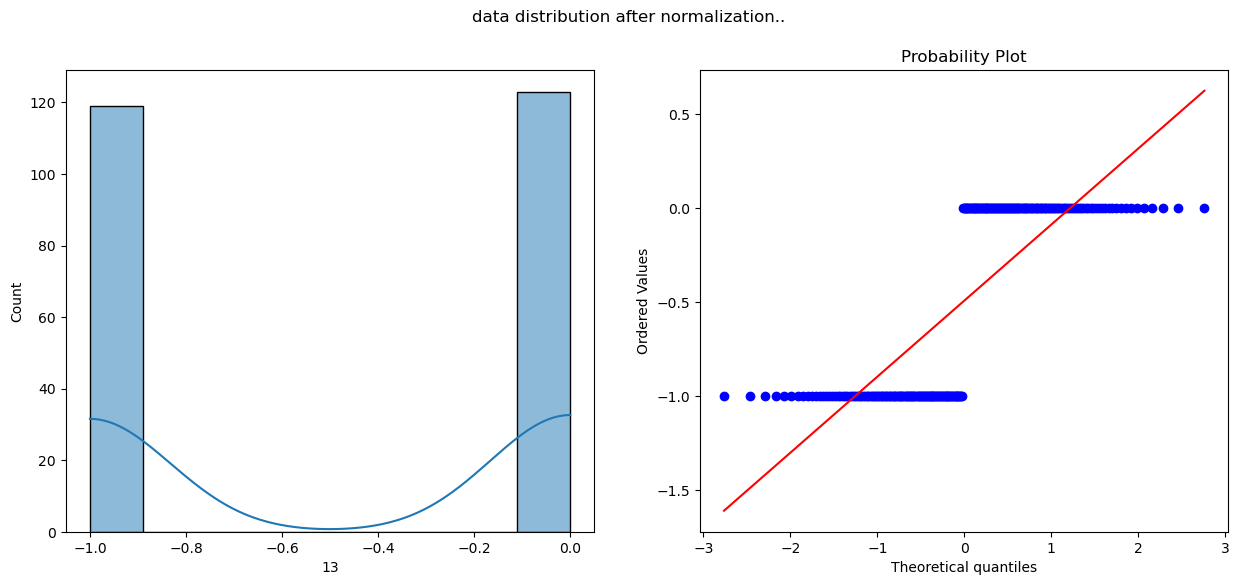

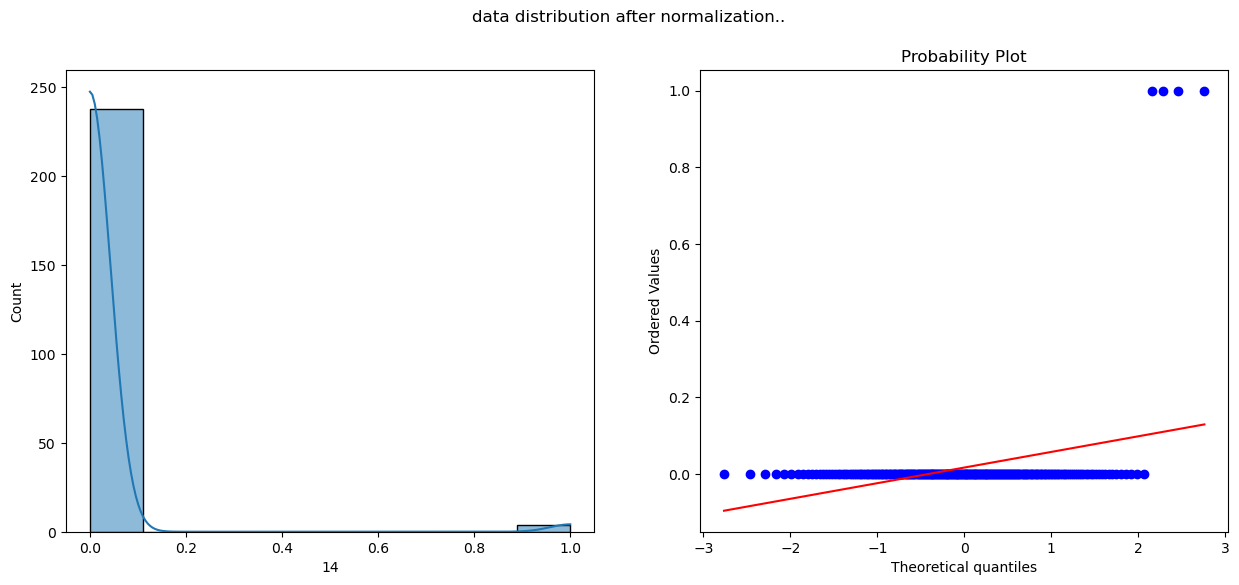

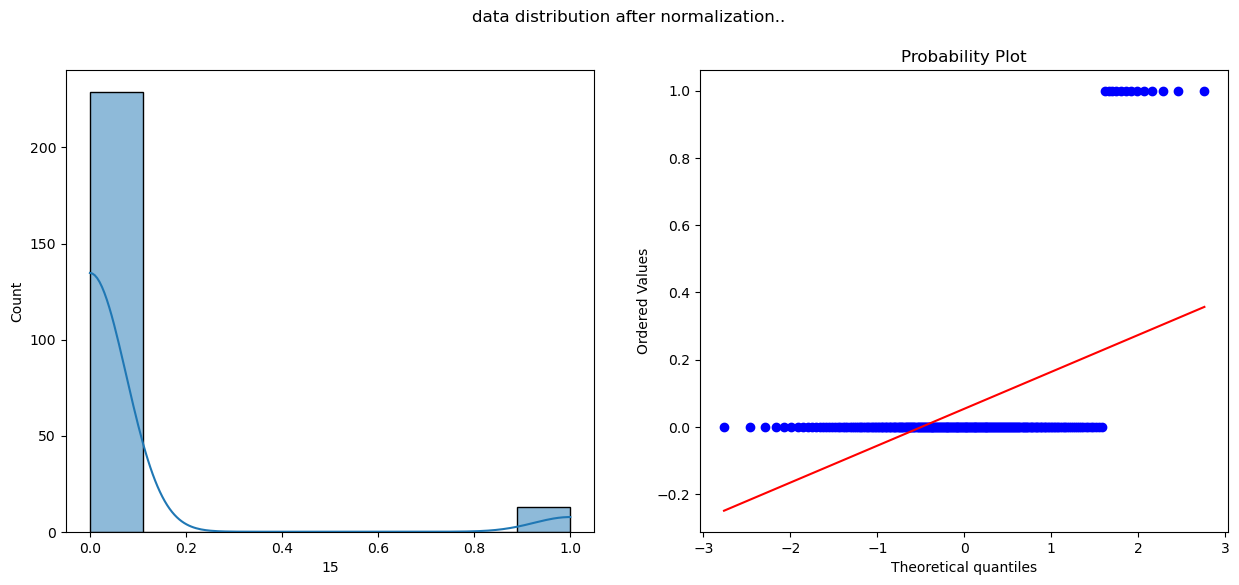

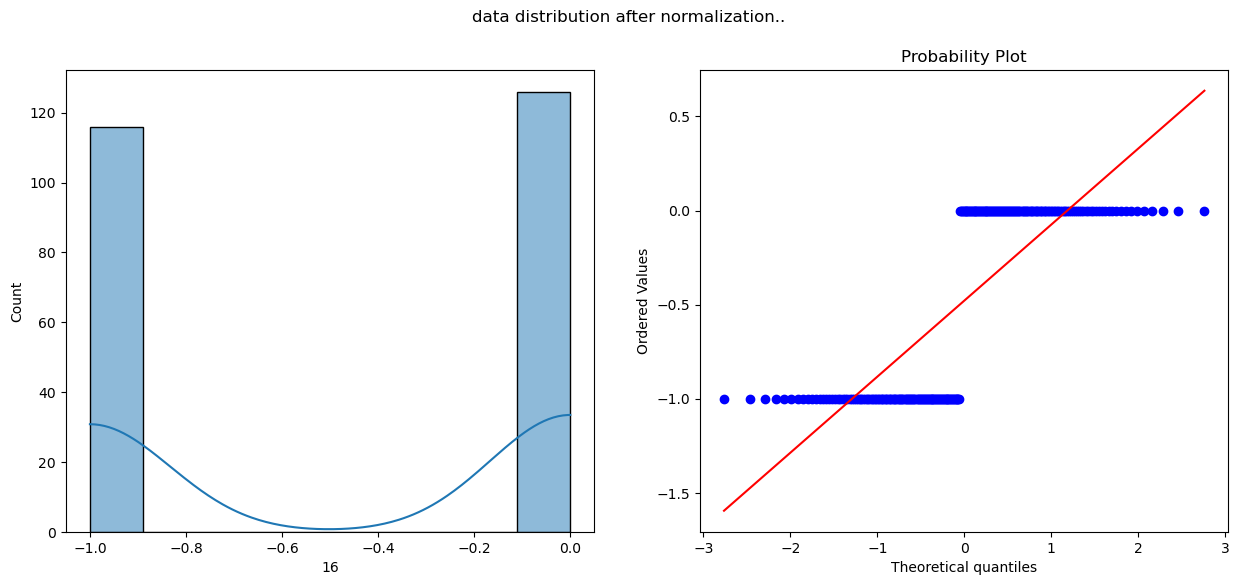

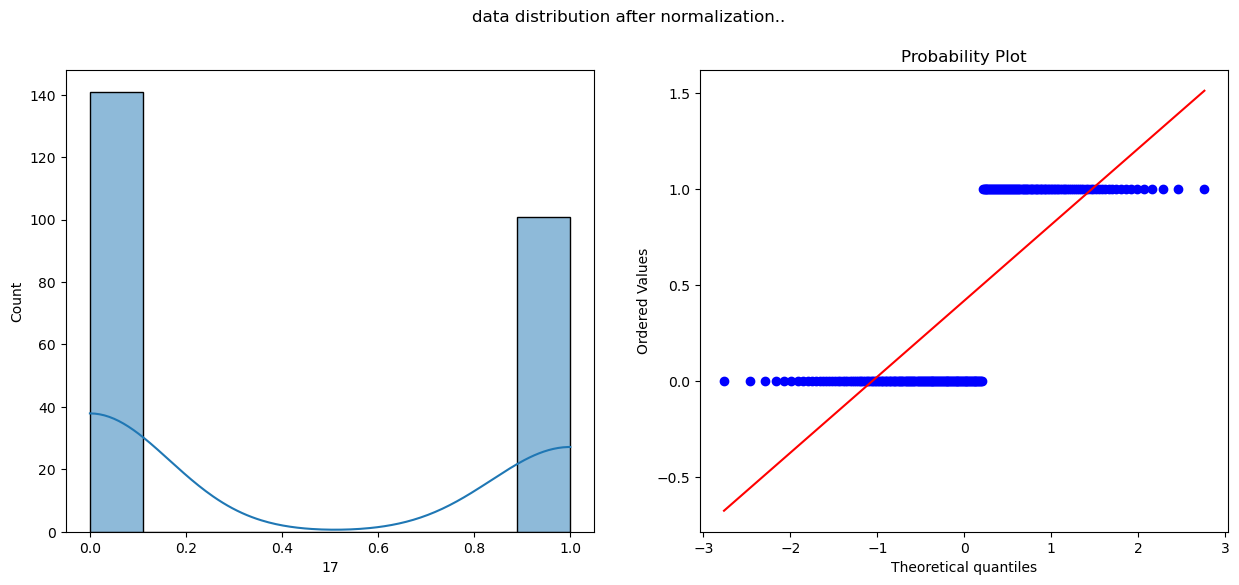

In [37]:
for i in X_train.columns:
    data_norm(X_train, i)

## data preprocessing on Test data

In [43]:
X_test.nunique()

age         29
sex          2
cp           4
trestbps    28
chol        54
fbs          2
restecg      2
thalach     40
exang        2
oldpeak     22
slope        3
ca           5
thal         3
dtype: int64

In [44]:
X_test.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

In [45]:
X_test[['cp', 'resetecg', 'thal']] = X_test[['cp', 'restecg','thal']].astype('O')

In [46]:
X_test.dtypes

age           int64
sex           int64
cp           object
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal         object
resetecg     object
dtype: object

In [48]:
X_test_numeric_cols = [feature for feature in X_test.columns if X_test[feature].dtype !='O']

In [49]:
X_test_numeric_cols

['age',
 'sex',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca']

In [50]:
len(X_test_numeric_cols)

11

In [51]:
X_test_categoric_cols = [feature for feature in X_test.columns if X_test[feature].dtypes == 'O']

In [52]:
X_test_categoric_cols

['cp', 'thal', 'resetecg']

In [53]:
X_test = pd.get_dummies(X_test, columns = ['cp', 'restecg', 'thal'], drop_first = True)

In [54]:
X_test.head()

age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  slope  ca  \
217   63    1       130   330    1      132      1      1.8      2   3   
157   35    1       122   192    0      174      0      0.0      2   0   
177   64    1       140   335    0      158      0      0.0      2   0   
9     57    1       150   168    0      174      0      1.6      2   0   
69    62    0       124   209    0      163      0      0.0      2   0   

    resetecg   cp_1   cp_2   cp_3  restecg_1  thal_2  thal_3  
217        0  False  False  False      False   False    True  
157        1   True  False  False       True    True   False  
177        1  False   True  False       True    True   False  
9          1  False   True  False       True    True   False  
69         1  False  False  False       True    True   False

In [55]:
X_test.dtypes

age            int64
sex            int64
trestbps       int64
chol           int64
fbs            int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
resetecg      object
cp_1            bool
cp_2            bool
cp_3            bool
restecg_1       bool
thal_2          bool
thal_3          bool
dtype: object

In [56]:
X_test_bool_features = [feature for feature in X_test.columns if X_test[feature].dtypes =='bool']

X_test_bool_features

['cp_1', 'cp_2', 'cp_3', 'restecg_1', 'thal_2', 'thal_3']

In [57]:
X_test[['cp_1', 'cp_2', 'cp_3', 'restecg_1', 'thal_2', 'thal_3']] = X_test[['cp_1', 'cp_2', 'cp_3', 'restecg_1', 'thal_2', 'thal_3']].astype('int')

In [58]:
X_test.dtypes

age            int64
sex            int64
trestbps       int64
chol           int64
fbs            int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
resetecg      object
cp_1           int32
cp_2           int32
cp_3           int32
restecg_1      int32
thal_2         int32
thal_3         int32
dtype: object

In [60]:
X_test.head()

age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  slope  ca  \
217   63    1       130   330    1      132      1      1.8      2   3   
157   35    1       122   192    0      174      0      0.0      2   0   
177   64    1       140   335    0      158      0      0.0      2   0   
9     57    1       150   168    0      174      0      1.6      2   0   
69    62    0       124   209    0      163      0      0.0      2   0   

    resetecg  cp_1  cp_2  cp_3  restecg_1  thal_2  thal_3  
217        0     0     0     0          0       0       1  
157        1     1     0     0          1       1       0  
177        1     0     1     0          1       1       0  
9          1     0     1     0          1       1       0  
69         1     0     0     0          1       1       0

In [61]:
X_test_numericFeatures = [feature for feature in X_test.columns if X_test[feature].dtypes !='O']

X_test_numericFeatures

['age',
 'sex',
 'trestbps',
 'chol',
 'fbs',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'cp_1',
 'cp_2',
 'cp_3',
 'restecg_1',
 'thal_2',
 'thal_3']

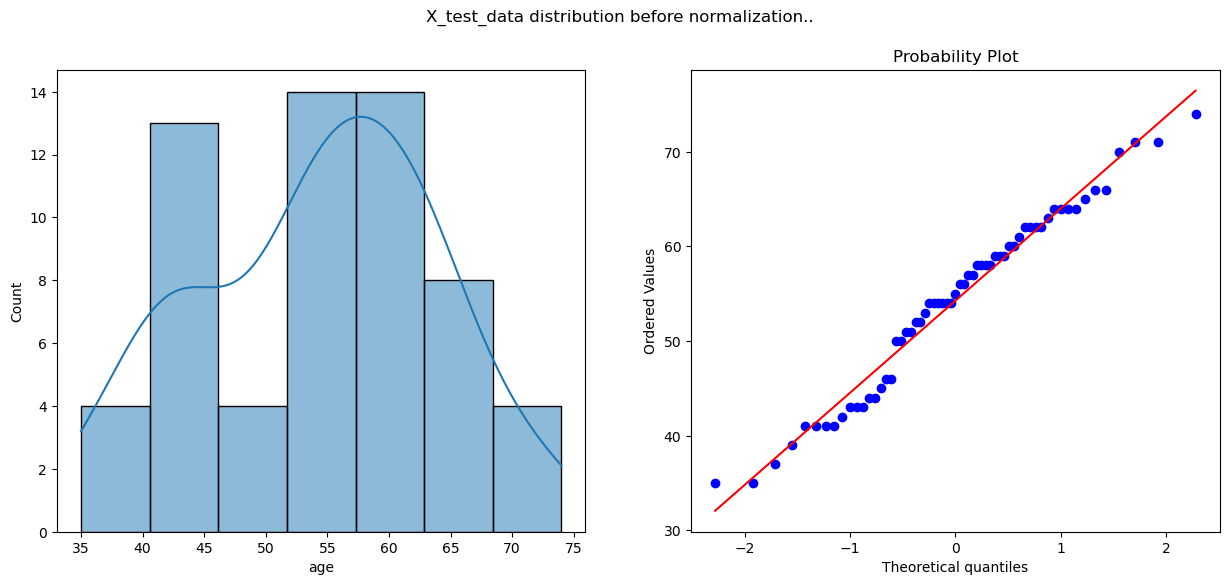

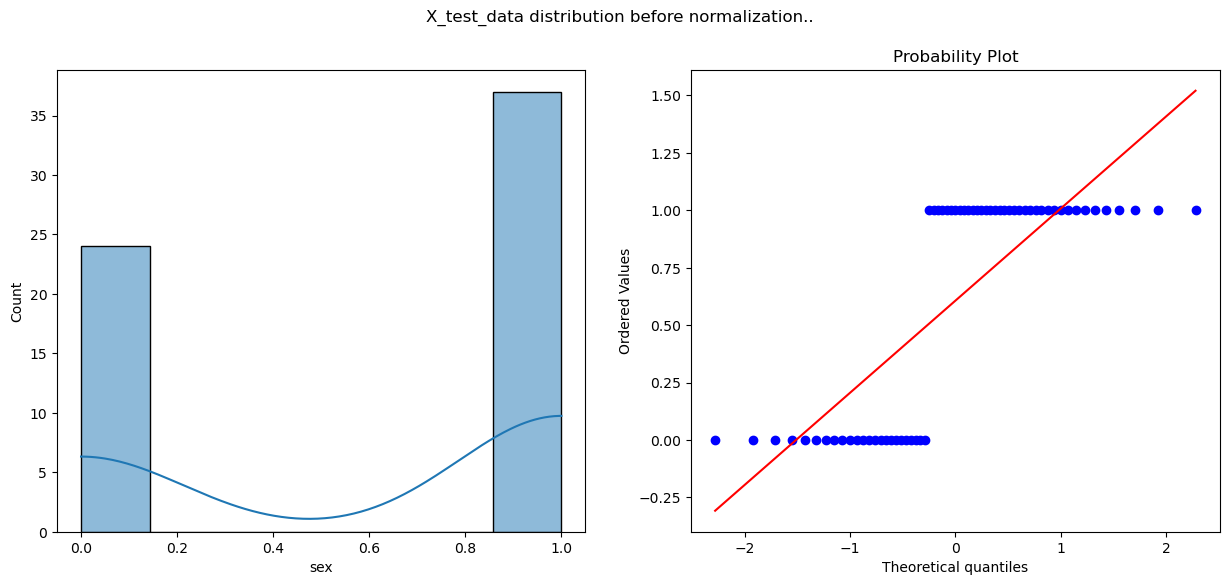

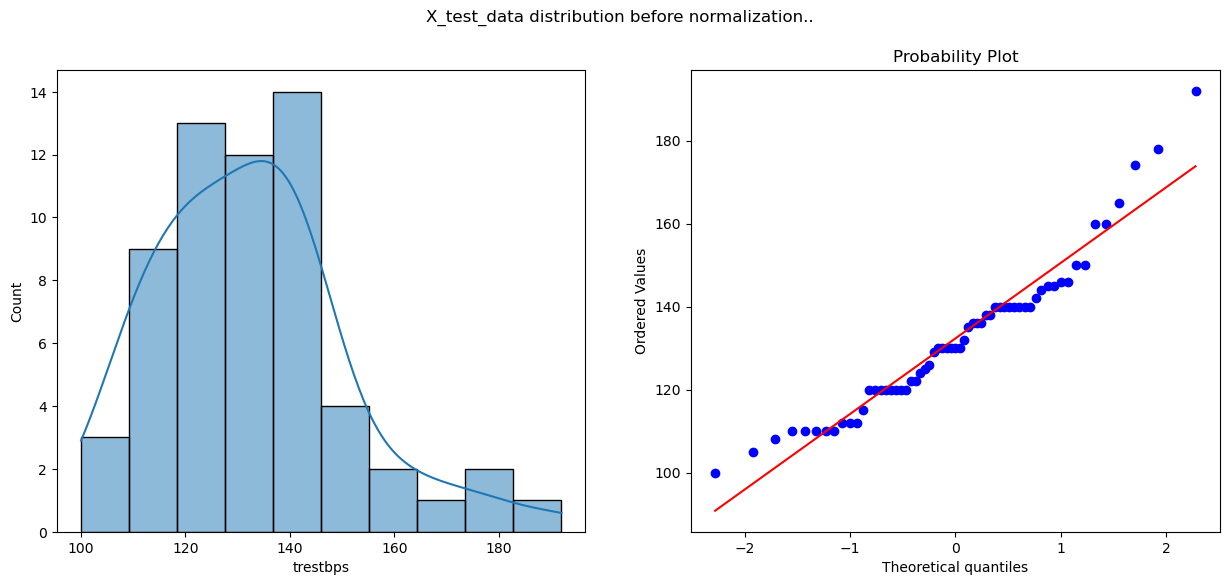

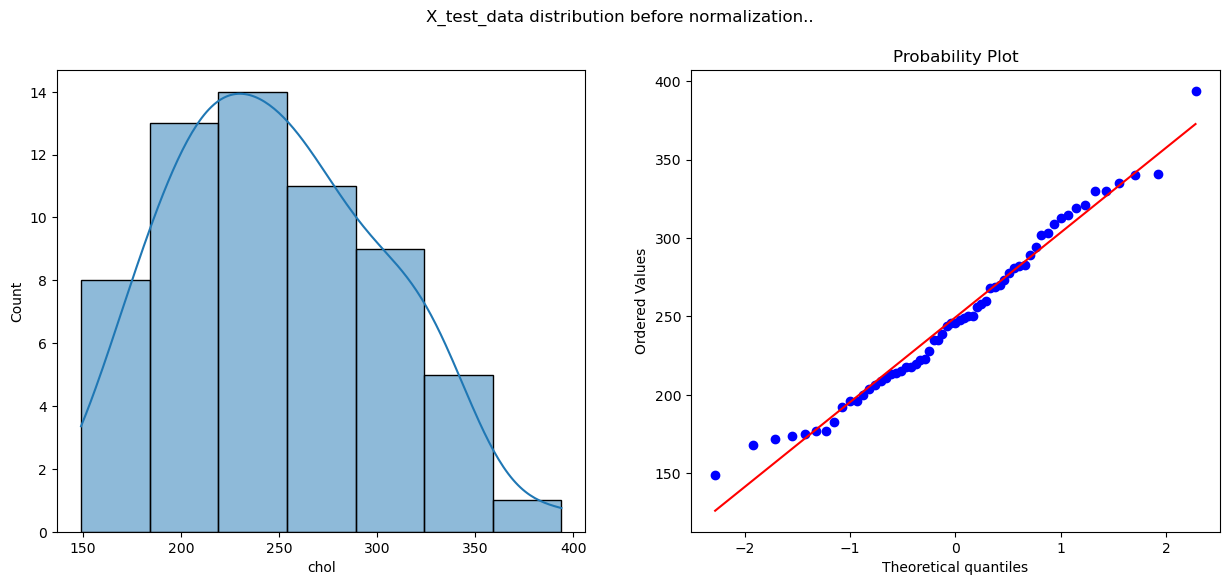

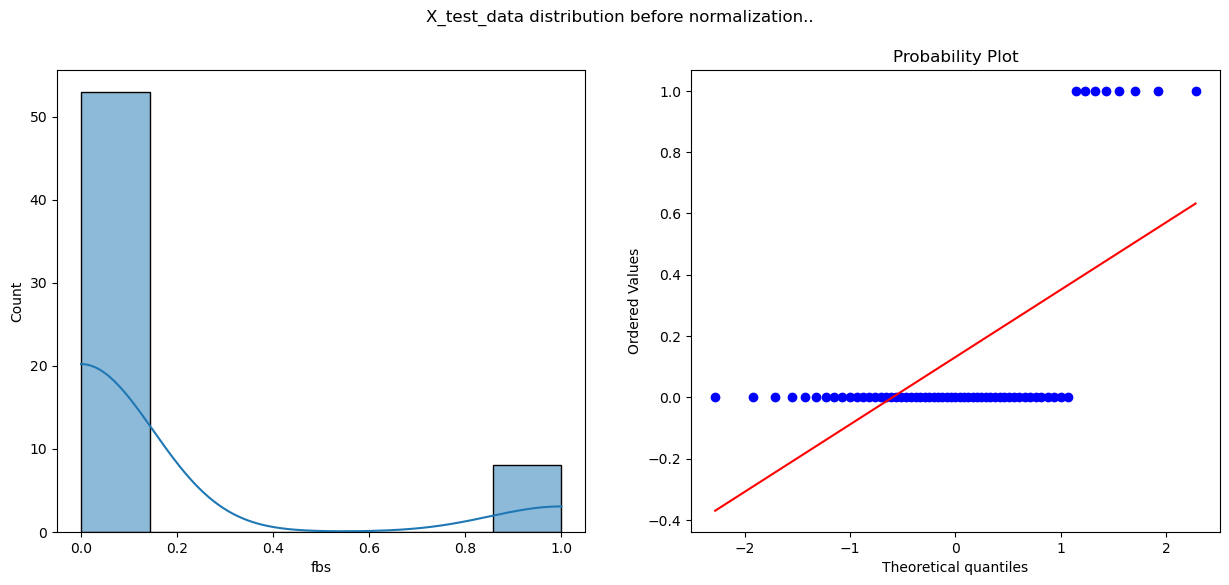

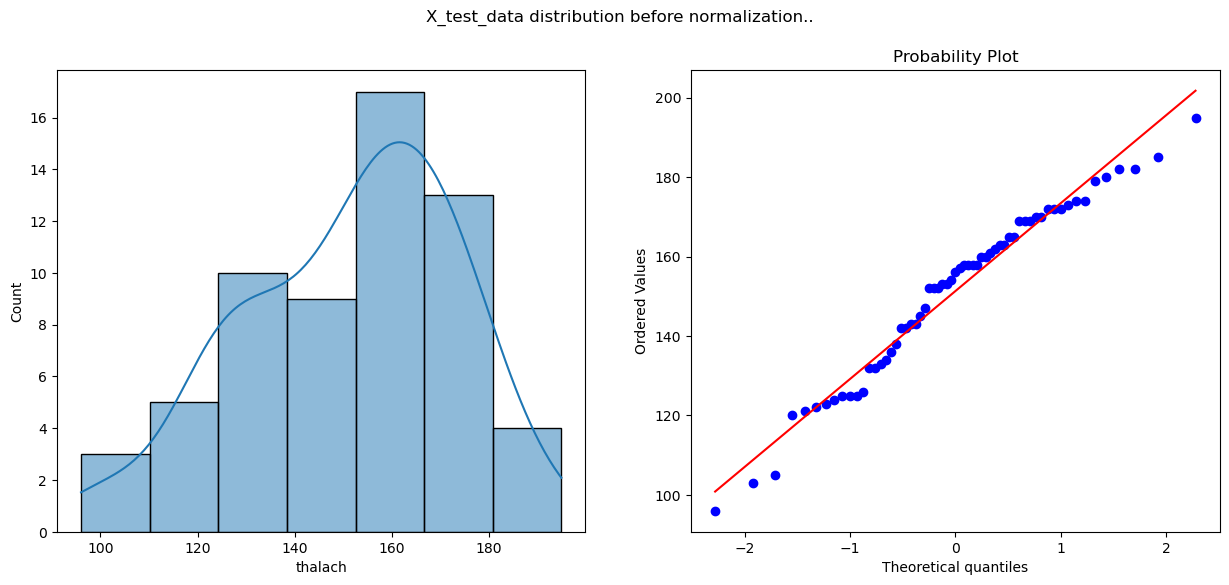

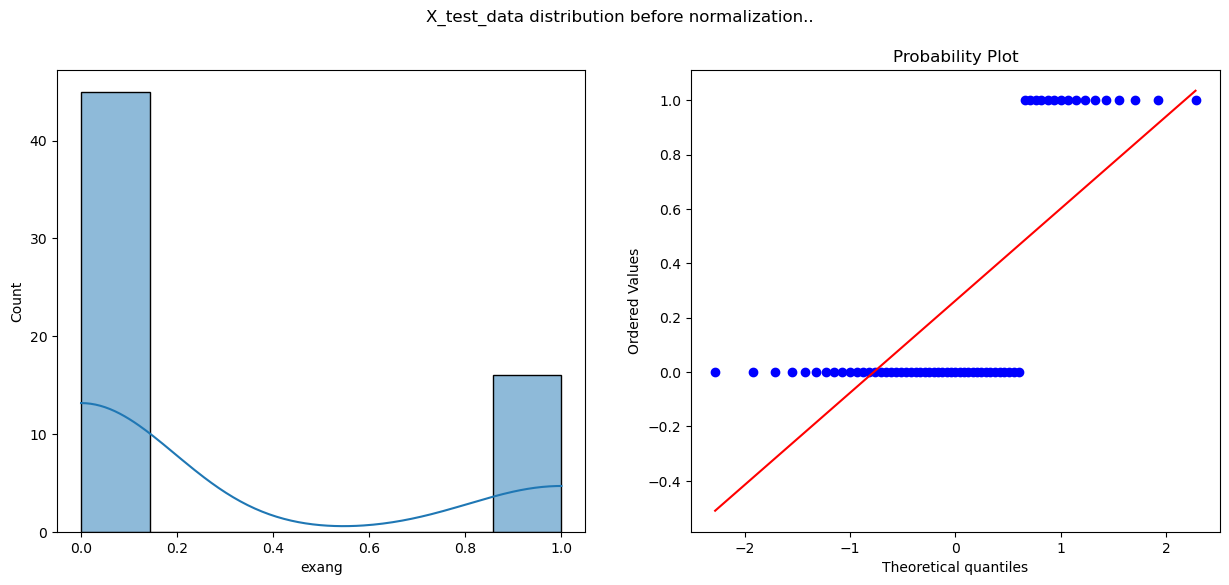

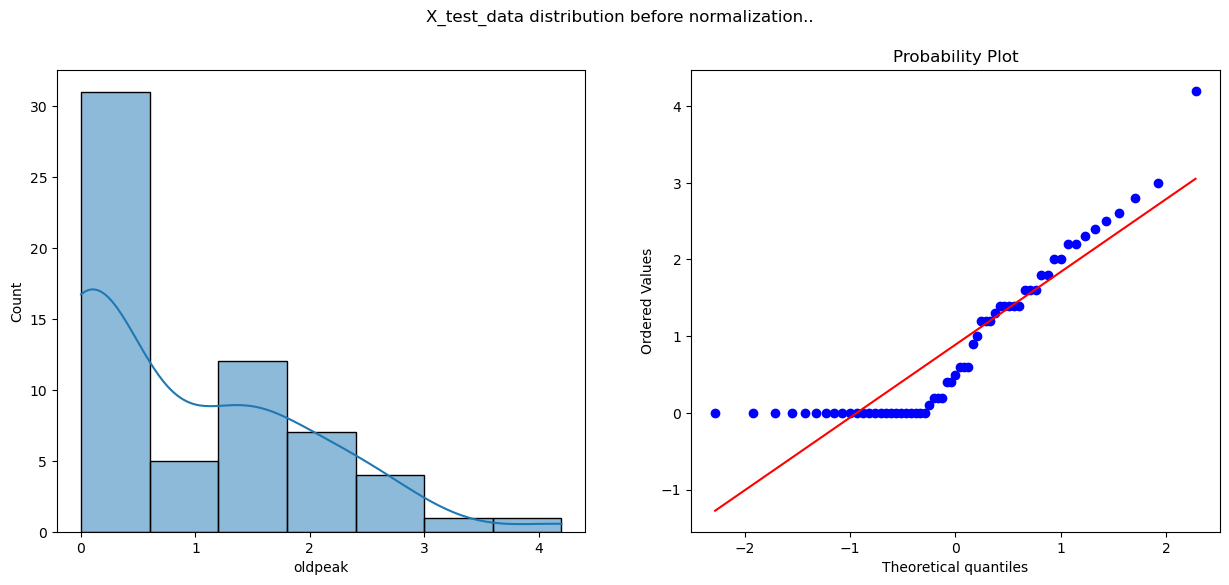

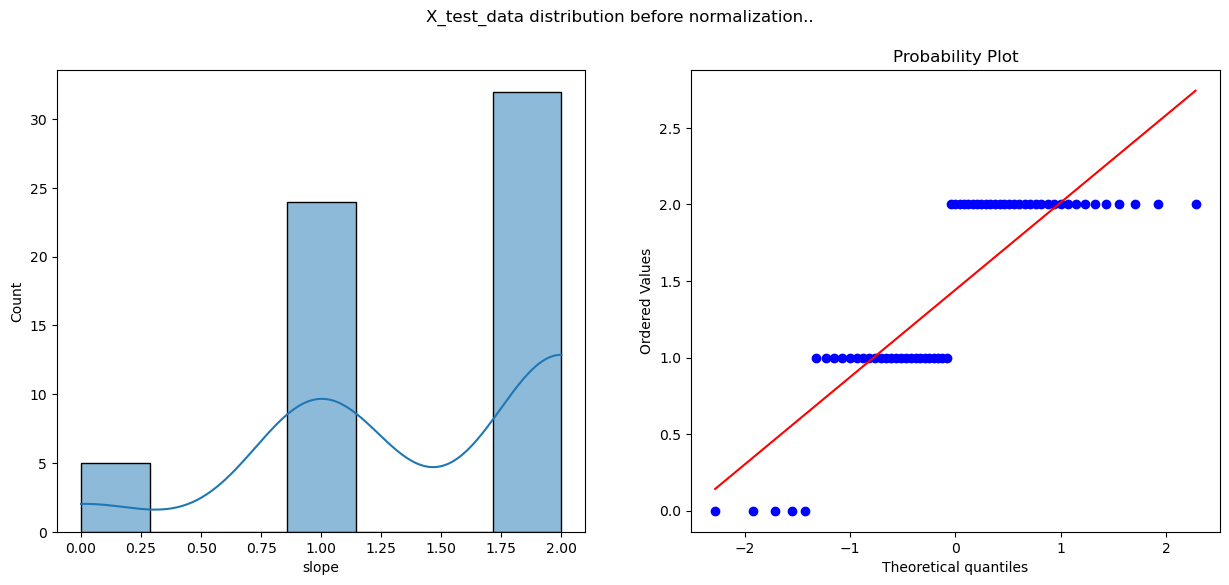

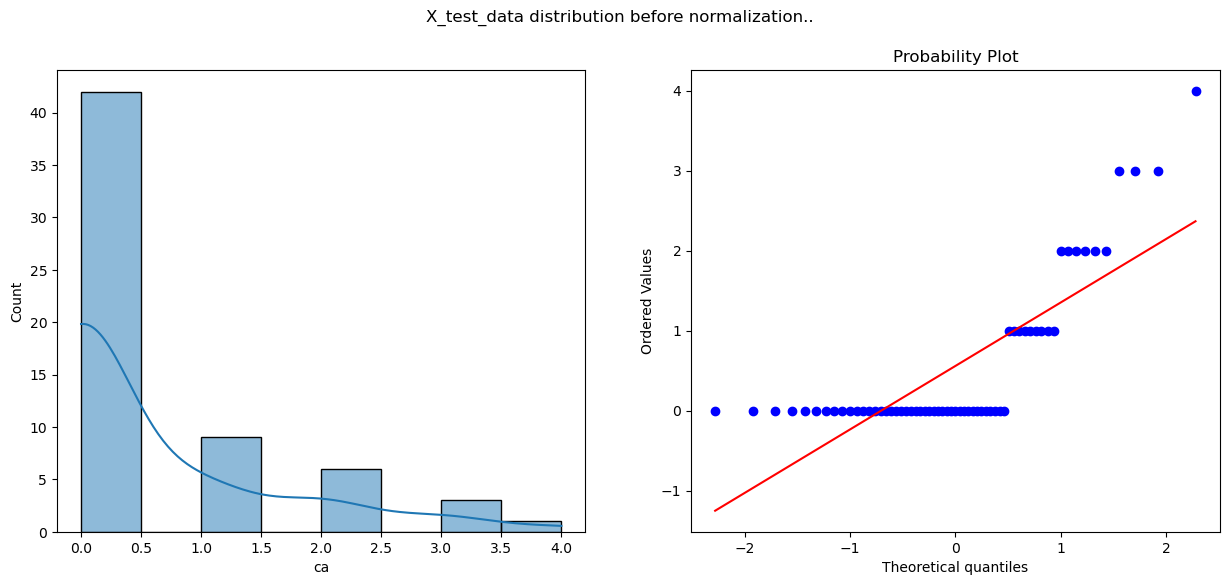

AttributeError: 'float' object has no attribute 'shape'

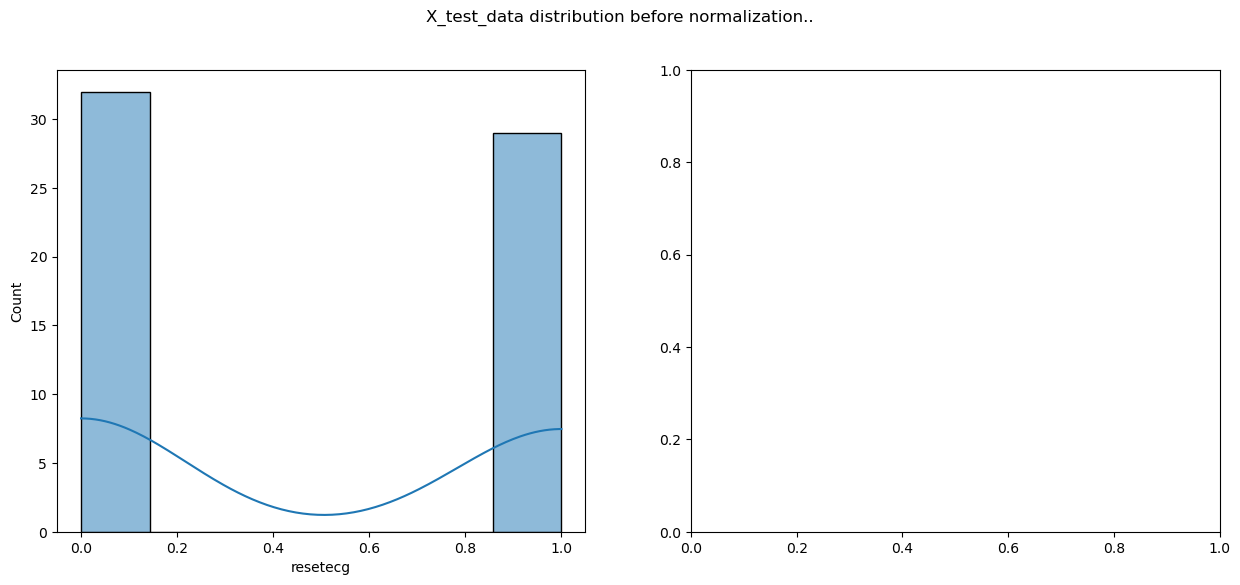

In [68]:
for i in X_test.columns:
    data_norm(X_test, i)

In [69]:
X_test_copy = X_test.copy()

In [70]:
X_test_copy.head()

age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  slope  ca  \
217   63    1       130   330    1      132      1      1.8      2   3   
157   35    1       122   192    0      174      0      0.0      2   0   
177   64    1       140   335    0      158      0      0.0      2   0   
9     57    1       150   168    0      174      0      1.6      2   0   
69    62    0       124   209    0      163      0      0.0      2   0   

    resetecg  cp_1  cp_2  cp_3  restecg_1  thal_2  thal_3  
217        0     0     0     0          0       0       1  
157        1     1     0     0          1       1       0  
177        1     0     1     0          1       1       0  
9          1     0     1     0          1       1       0  
69         1     0     0     0          1       1       0

In [71]:
X_test = X_test**(1/2)

X_test.head()

age  sex   trestbps       chol  fbs    thalach  exang   oldpeak  \
217  7.937254  1.0  11.401754  18.165902  1.0  11.489125    1.0  1.341641   
157  5.916080  1.0  11.045361  13.856406  0.0  13.190906    0.0  0.000000   
177  8.000000  1.0  11.832160  18.303005  0.0  12.569805    0.0  0.000000   
9    7.549834  1.0  12.247449  12.961481  0.0  13.190906    0.0  1.264911   
69   7.874008  0.0  11.135529  14.456832  0.0  12.767145    0.0  0.000000   

        slope        ca resetecg  cp_1  cp_2  cp_3  restecg_1  thal_2  thal_3  
217  1.414214  1.732051      0.0   0.0   0.0   0.0        0.0     0.0     1.0  
157  1.414214  0.000000      1.0   1.0   0.0   0.0        1.0     1.0     0.0  
177  1.414214  0.000000      1.0   0.0   1.0   0.0        1.0     1.0     0.0  
9    1.414214  0.000000      1.0   0.0   1.0   0.0        1.0     1.0     0.0  
69   1.414214  0.000000      1.0   0.0   0.0   0.0        1.0     1.0     0.0

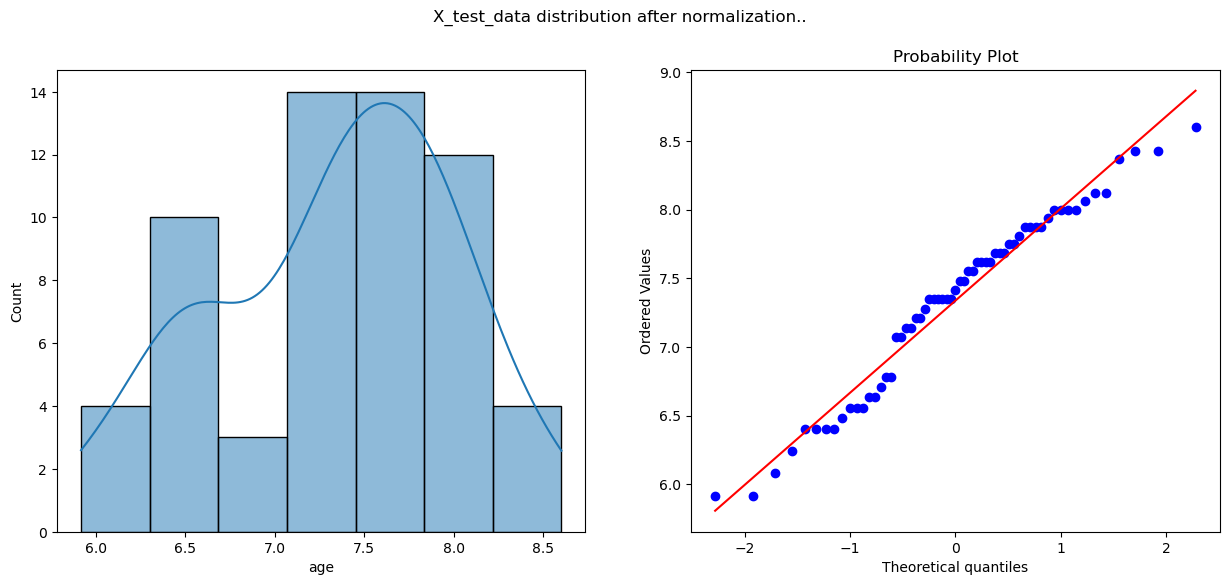

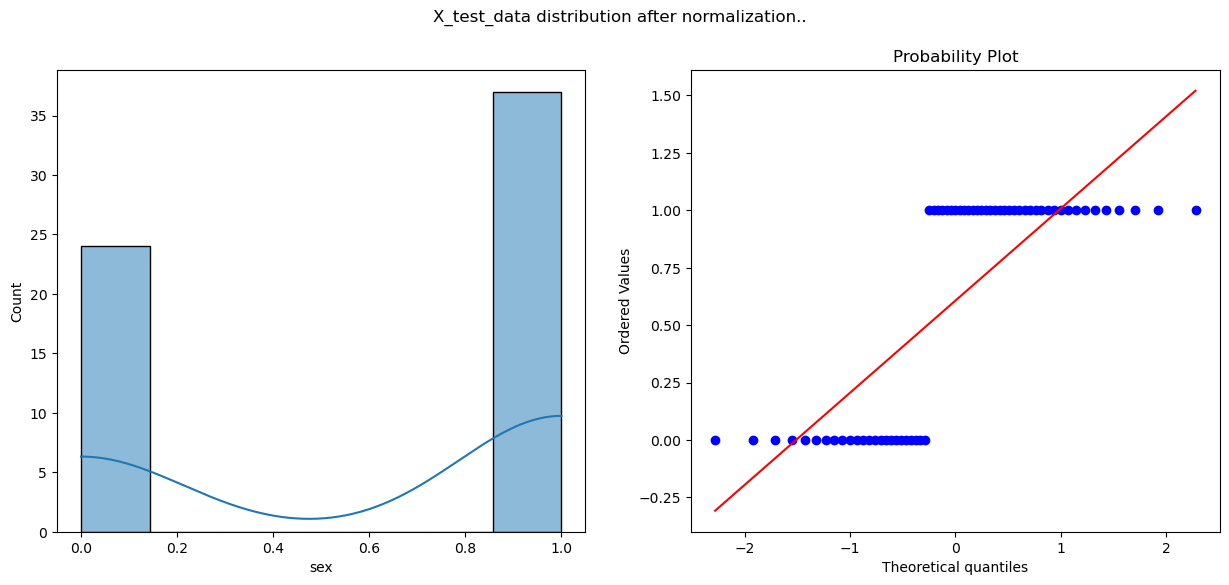

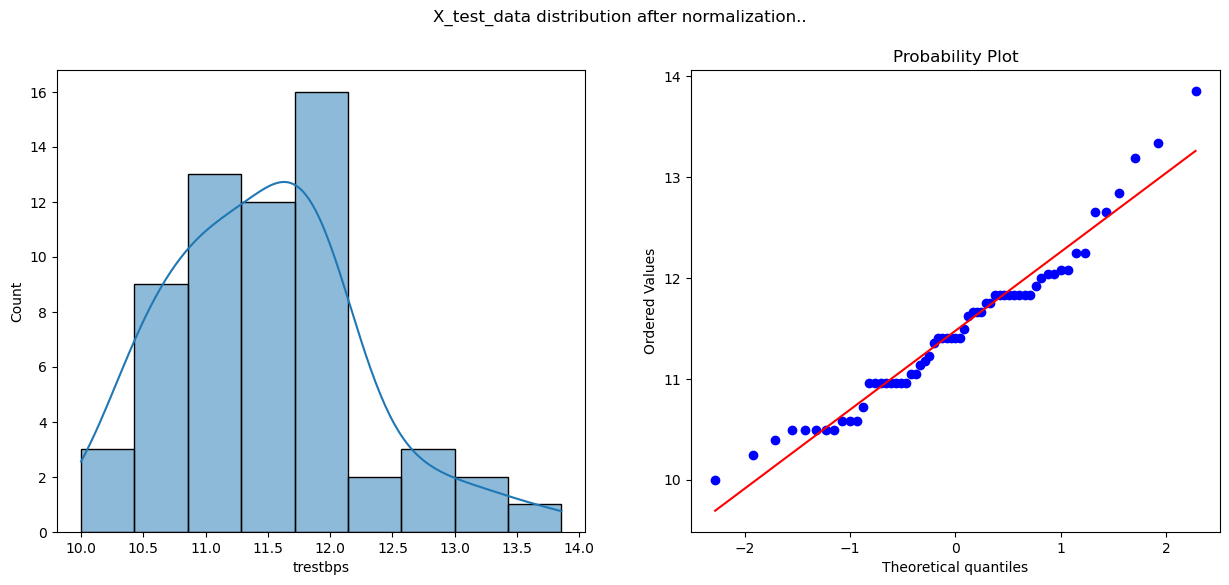

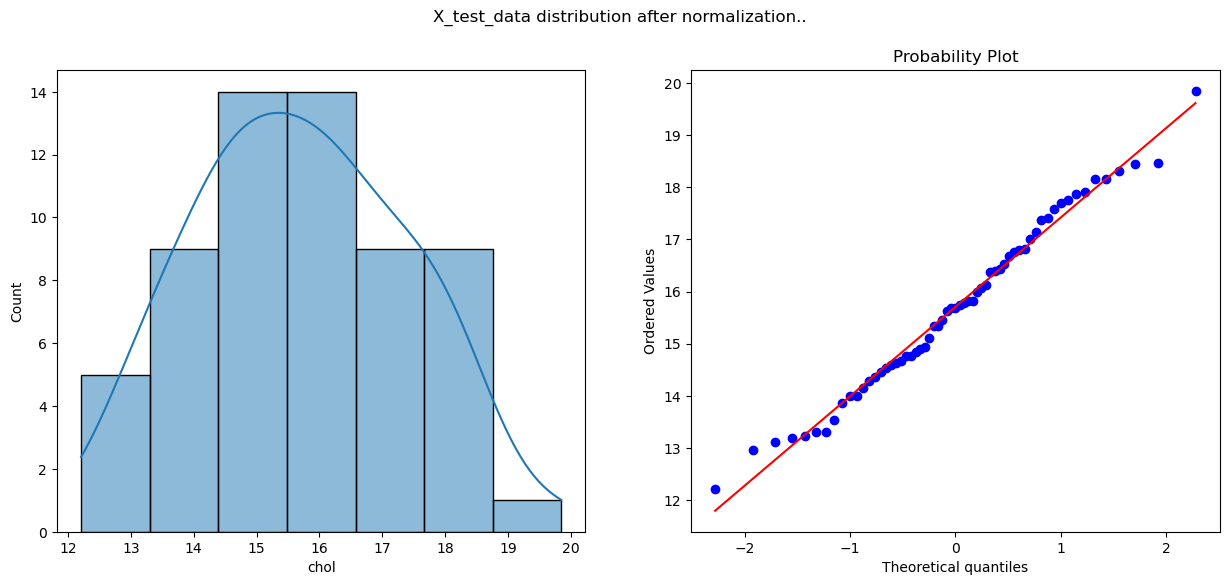

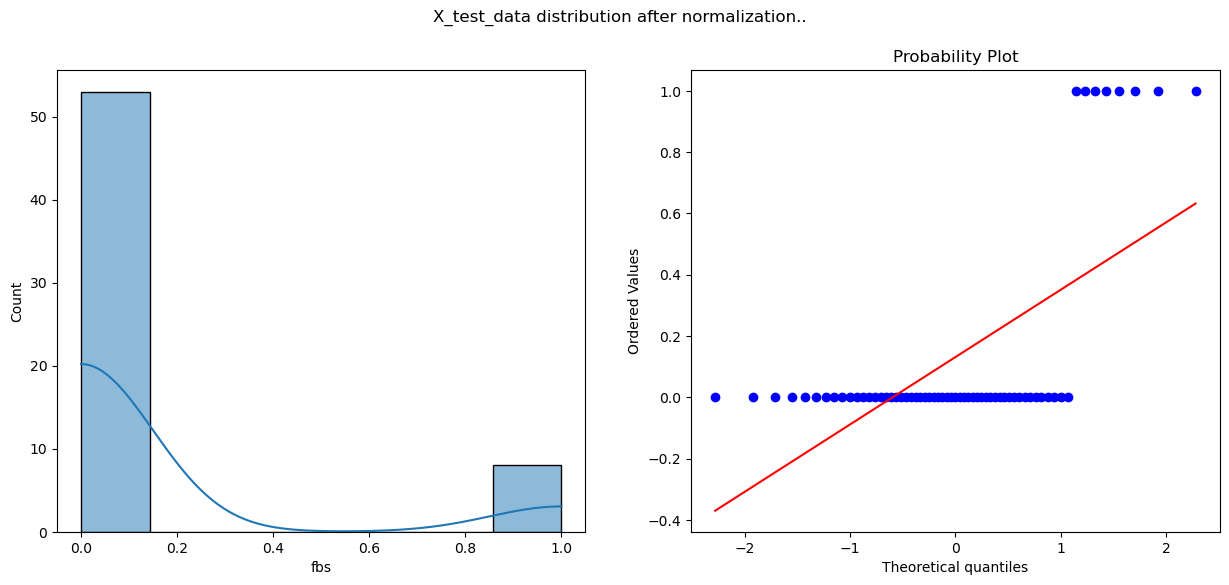

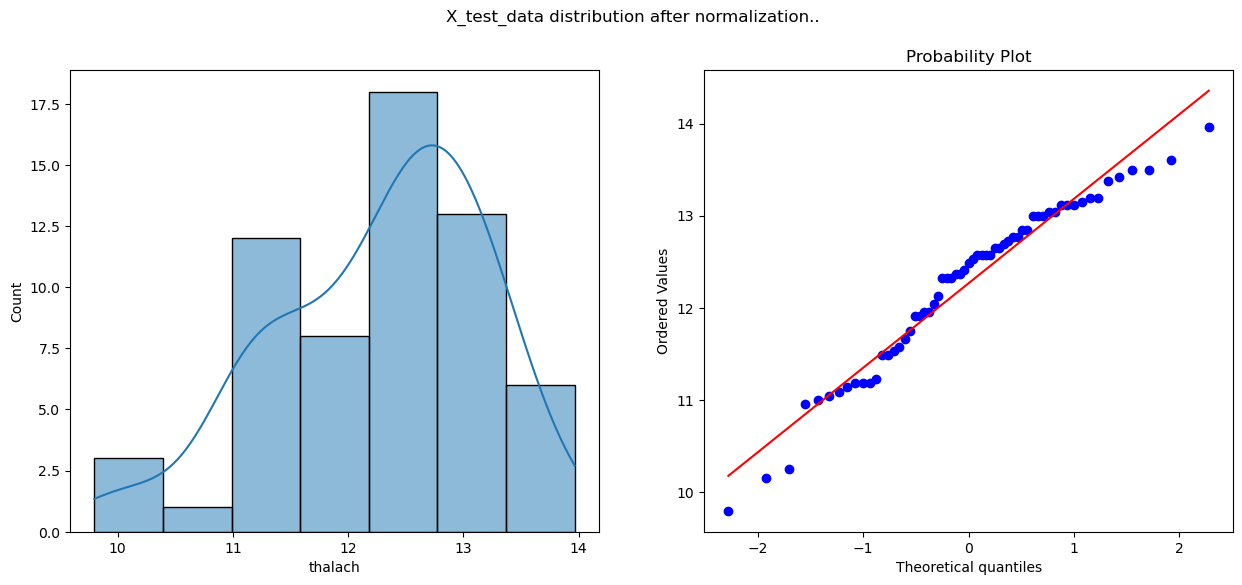

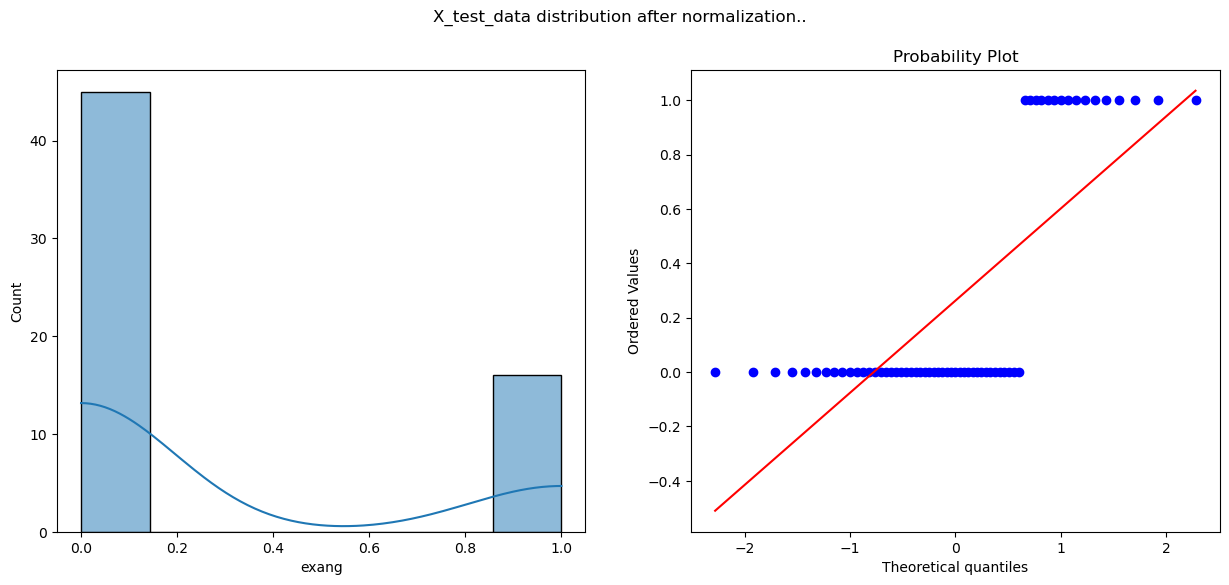

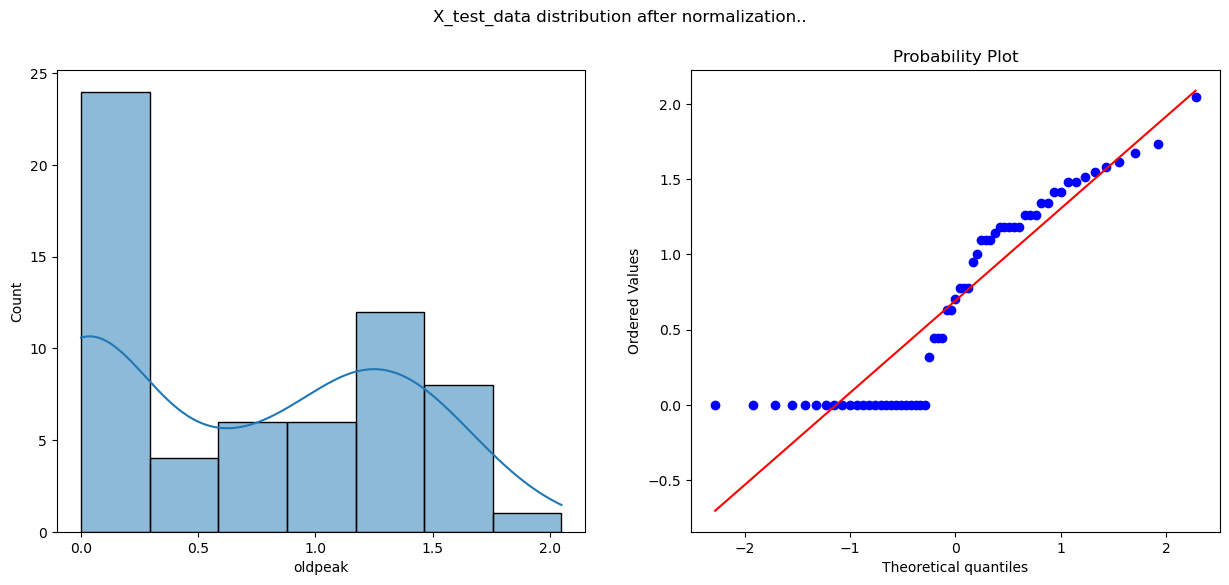

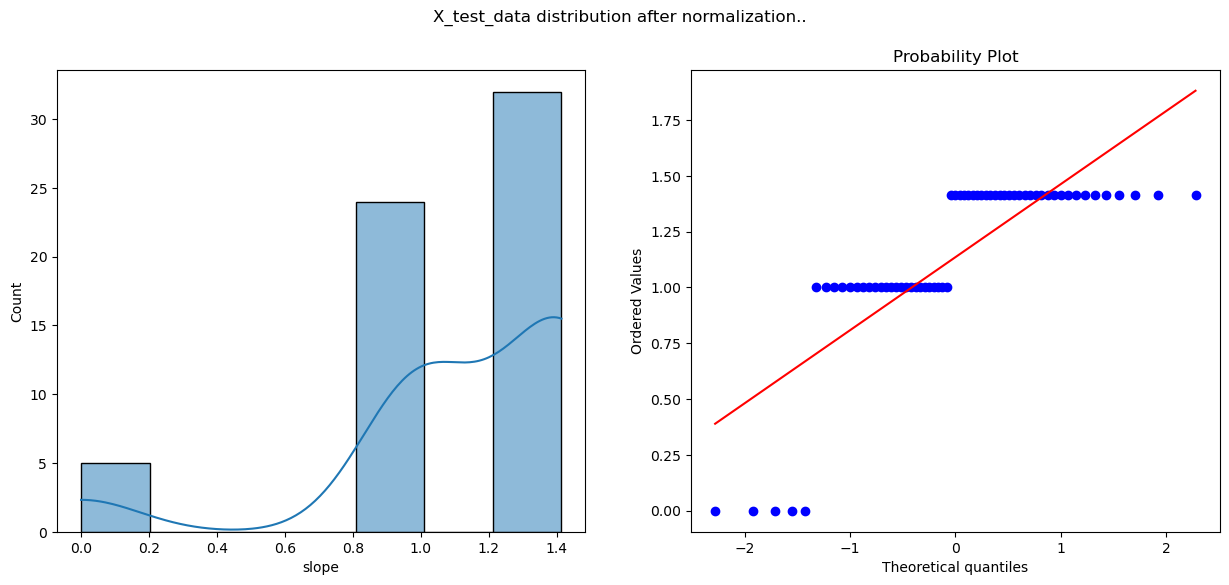

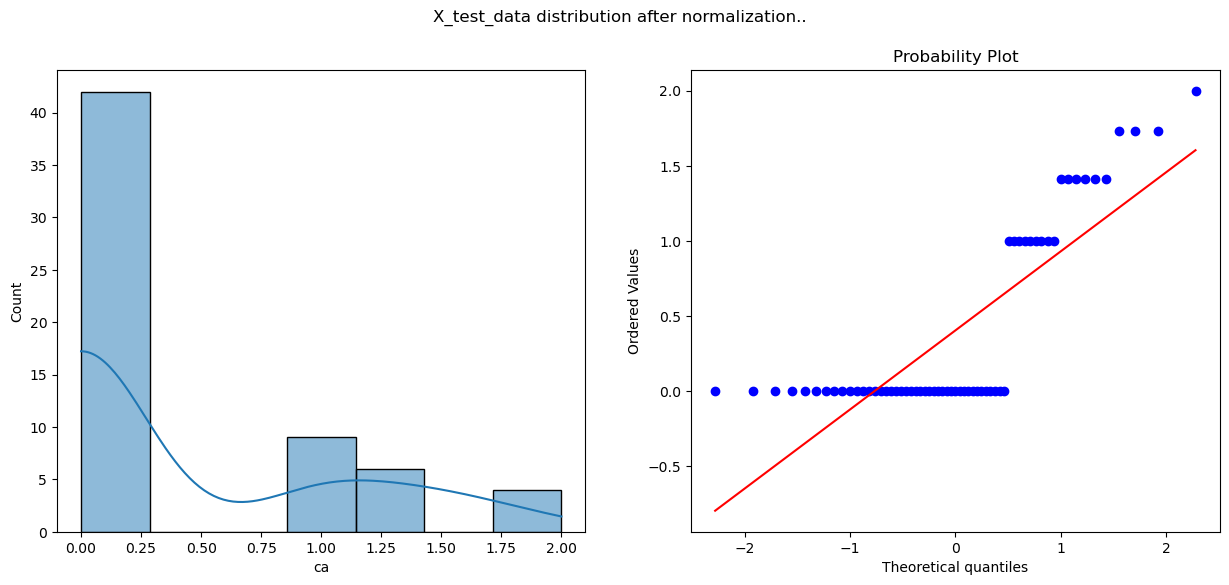

AttributeError: 'float' object has no attribute 'shape'

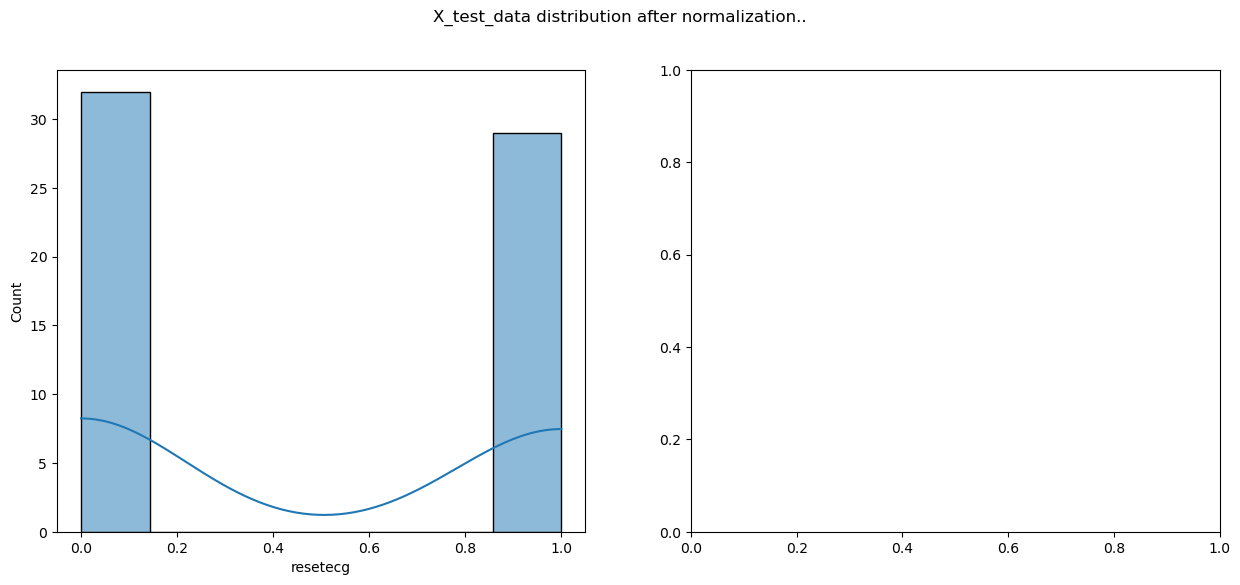

In [73]:
for i in X_test.columns:
    data_norm(X_test, i)

In [74]:
X_test = robust_scaler.fit_transform(X_test)

In [75]:
X_test = pd.DataFrame(X_test)

X_test.head()

0    1         2         3    4         5    6         7    8   \
0  0.477298  0.0  0.000000  1.080439  1.0 -0.702778  1.0  0.501643  0.0   
1 -1.374140  0.0 -0.406050 -0.795894  0.0  0.492156  0.0 -0.559017  0.0   
2  0.534775  0.0  0.490374  1.140133  0.0  0.056039  0.0 -0.559017  0.0   
3  0.122413  0.0  0.963526 -1.185540  0.0  0.492156  0.0  0.440983  0.0   
4  0.419363 -1.0 -0.303319 -0.534471  0.0  0.194605  0.0 -0.559017  0.0   

         9    10   11   12   13   14   15   16  
0  1.732051  0.0  0.0  0.0  0.0  0.0 -1.0  1.0  
1  0.000000  1.0  1.0  0.0  0.0  1.0  0.0  0.0  
2  0.000000  1.0  0.0  1.0  0.0  1.0  0.0  0.0  
3  0.000000  1.0  0.0  1.0  0.0  1.0  0.0  0.0  
4  0.000000  1.0  0.0  0.0  0.0  1.0  0.0  0.0

In [77]:
X_train.shape, X_test.shape

((242, 18), (61, 17))